In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [41]:
run00 = h5py.File('data/octet-psq0_nb1000_bin2.h5', 'r')
run00.keys()

<KeysViewHDF5 ['octet(0)']>

In [44]:
run00['octet(0)']['mean']

<HDF5 dataset "mean": shape (32,), type "<f8">

## Validation Loss curves

### Sigmas

In [18]:
# Import the loss from a csv file
df = pd.read_csv('trained_models/Nref_n/replica_3_best_history.csv')

train_loss = df['train_loss']
val_loss = df['val_loss']
epochs = np.arange(len(val_loss))

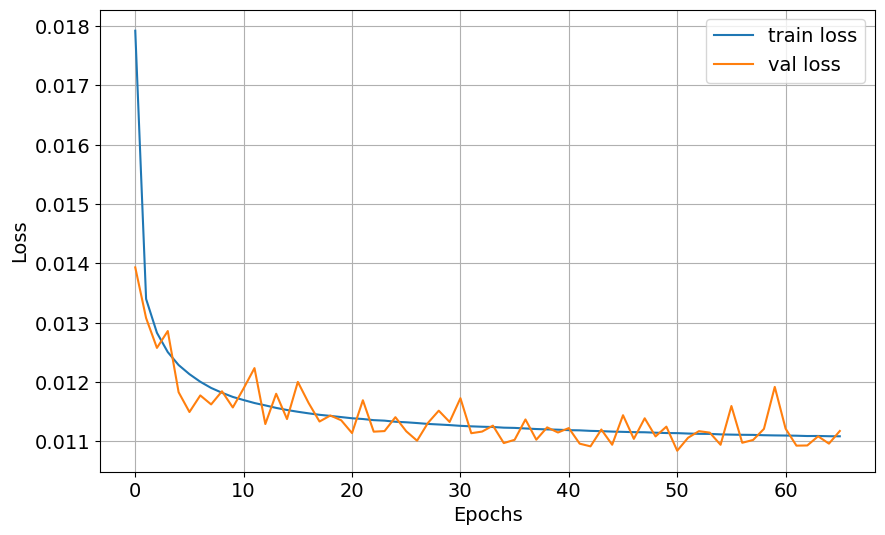

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

### Alphas

In [19]:
# Import the loss from a csv file
df = pd.read_csv('trained_models_momenta/Nmax_alpha0/replica_1_best_history.csv')

train_loss = df['train_loss']
val_loss = df['val_loss']
epochs = np.arange(len(val_loss))

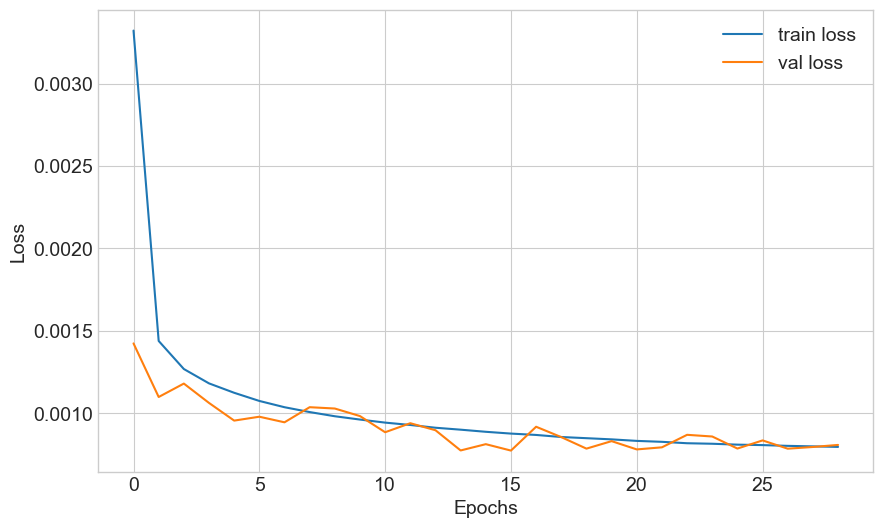

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Using pandas as shown in your example

# --- CONFIGURATION ---
# Base directory where the job folders (e.g., Nmax_alpha0) are located
BASE_MODELS_DIR = "trained_models_momenta"
# Define the job combinations you want to be able to plot
# This helps construct paths and titles
JOB_DEFINITIONS = {
    "Nmax_alpha0": {"label": "Nmax", "alpha": 0},
    "Nmax_alpha1": {"label": "Nmax", "alpha": 1},
    "Nref_b_alpha0": {"label": "Nref_b", "alpha": 0},
    "Nref_b_alpha1": {"label": "Nref_b", "alpha": 1},
    "Nref_n_alpha0": {"label": "Nref_n", "alpha": 0},
    "Nref_n_alpha1": {"label": "Nref_n", "alpha": 1},
    "Nref_rho_alpha0": {"label": "Nref_rho", "alpha": 0},
    "Nref_rho_alpha1": {"label": "Nref_rho", "alpha": 1},
}
# Number of replicas trained for each job
NUM_REPLICAS = 5

def plot_loss_history(job_key, base_dir=BASE_MODELS_DIR, num_replicas=NUM_REPLICAS):
    """
    Reads and plots the validation loss history for all replicas of a specific training job.

    Args:
        job_key (str): The key corresponding to the job in JOB_DEFINITIONS (e.g., "Nmax_alpha0").
        base_dir (str): The base directory containing the trained model folders.
        num_replicas (int): The number of replica history files to look for.
    """
    if job_key not in JOB_DEFINITIONS:
        print(f"Error: Job key '{job_key}' not found in JOB_DEFINITIONS.")
        return

    job_info = JOB_DEFINITIONS[job_key]
    job_label = job_info["label"]
    alpha = job_info["alpha"]
    
    # Construct the directory path for this specific job
    #job_dir = os.path.join(base_dir, f"{job_label}_alpha{alpha}")
    job_dir = os.path.join(base_dir, f"{job_label}")
    
    print(f"--- Plotting Validation Loss History for: {job_key} ---")
    print(f"--- Looking in directory: {job_dir} ---")

    all_val_losses = []
    all_epochs = []
    found_files = 0

    # Loop through each replica
    for replica_num in range(1, num_replicas + 1):
        # Construct the expected filename
        history_filename = f"replica_{replica_num}_best_history.csv"
        history_filepath = os.path.join(job_dir, history_filename)

        if os.path.exists(history_filepath):
            try:
                # Read the CSV file using pandas
                df = pd.read_csv(history_filepath)
                # Extract the validation loss column
                val_loss = df['val_loss'].values
                epochs = np.arange(1, len(val_loss) + 1) # Epochs start from 1
                
                all_val_losses.append(val_loss)
                all_epochs.append(epochs)
                found_files += 1
                print(f"  Loaded history for replica {replica_num} ({len(epochs)} epochs)")
            except Exception as e:
                print(f"  Warning: Could not read file for replica {replica_num}. Error: {e}")
        else:
            print(f"  Warning: History file not found for replica {replica_num}: {history_filepath}")

    # Plotting
    if found_files > 0:
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(12, 7))
        
        # Plot each replica's history
        for i in range(found_files):
            ax.plot(all_epochs[i], all_val_losses[i], marker='.', linestyle='-', alpha=0.7, label=f'Replica {i+1}')
            
        ax.set_yscale('log')
        ax.set_title(f'Validation Loss History - Job: {job_label}', fontsize=16)
        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel('Validation Loss (MAE - Log Scale)', fontsize=12)
        ax.legend(title="Replicas")
        ax.grid(True, which="both", ls="--")
        
        # Add annotation for the minimum loss achieved across all replicas
        min_loss_overall = min(vl.min() for vl in all_val_losses)
        ax.axhline(min_loss_overall, color='red', linestyle=':', lw=1.5, label=f'Min Loss: {min_loss_overall:.3e}')
        ax.legend() # Update legend to include min loss line
        
        plt.tight_layout()
        plt.savefig(f"val_loss_alpha/{job_key}" + ".png")
        plt.show()
    else:
        print("\nError: No history files found for this job. Cannot generate plot.")

--- Plotting Validation Loss History for: Nmax_alpha0 ---
--- Looking in directory: trained_models_momenta\Nmax_alpha0 ---
  Loaded history for replica 1 (29 epochs)
  Loaded history for replica 2 (40 epochs)
  Loaded history for replica 3 (40 epochs)
  Loaded history for replica 4 (60 epochs)
  Loaded history for replica 5 (67 epochs)


--- Plotting Validation Loss History for: Nmax_alpha1 ---
--- Looking in directory: trained_models_momenta\Nmax_alpha1 ---
  Loaded history for replica 1 (55 epochs)
  Loaded history for replica 2 (46 epochs)
  Loaded history for replica 3 (93 epochs)
  Loaded history for replica 4 (76 epochs)
  Loaded history for replica 5 (71 epochs)


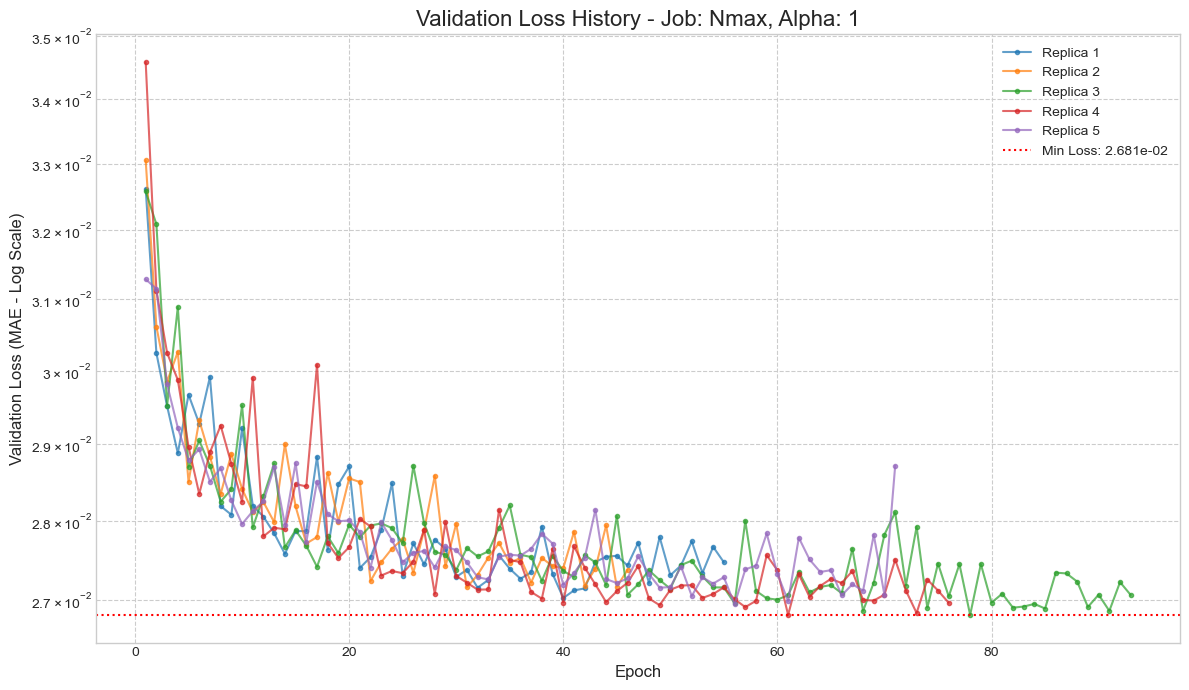

--- Plotting Validation Loss History for: Nref_b_alpha0 ---
--- Looking in directory: trained_models_momenta\Nref_b_alpha0 ---
  Loaded history for replica 1 (44 epochs)
  Loaded history for replica 2 (57 epochs)
  Loaded history for replica 3 (80 epochs)
  Loaded history for replica 4 (60 epochs)
  Loaded history for replica 5 (51 epochs)


--- Plotting Validation Loss History for: Nref_b_alpha1 ---
--- Looking in directory: trained_models_momenta\Nref_b_alpha1 ---
  Loaded history for replica 1 (60 epochs)
  Loaded history for replica 2 (39 epochs)
  Loaded history for replica 3 (67 epochs)
  Loaded history for replica 4 (71 epochs)
  Loaded history for replica 5 (101 epochs)


--- Plotting Validation Loss History for: Nref_n_alpha0 ---
--- Looking in directory: trained_models_momenta\Nref_n_alpha0 ---
  Loaded history for replica 1 (46 epochs)
  Loaded history for replica 2 (49 epochs)
  Loaded history for replica 3 (72 epochs)
  Loaded history for replica 4 (76 epochs)
  Loaded history for replica 5 (47 epochs)


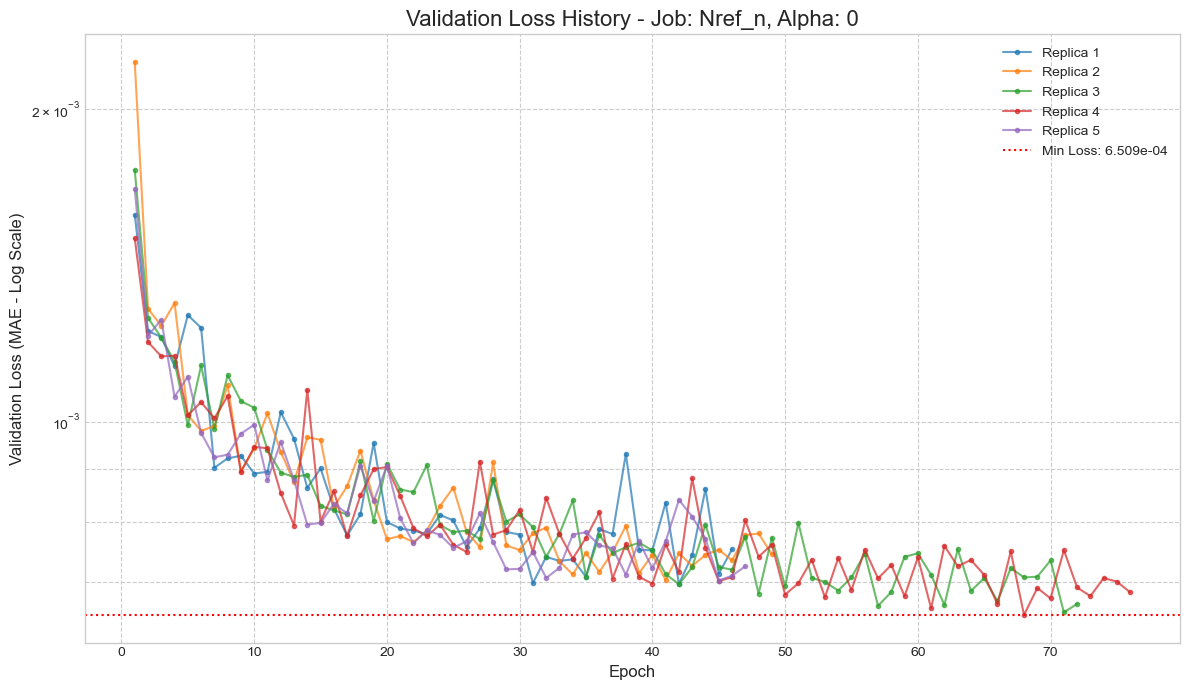

--- Plotting Validation Loss History for: Nref_n_alpha1 ---
--- Looking in directory: trained_models_momenta\Nref_n_alpha1 ---
  Loaded history for replica 1 (92 epochs)
  Loaded history for replica 2 (69 epochs)
  Loaded history for replica 3 (57 epochs)
  Loaded history for replica 4 (44 epochs)
  Loaded history for replica 5 (66 epochs)


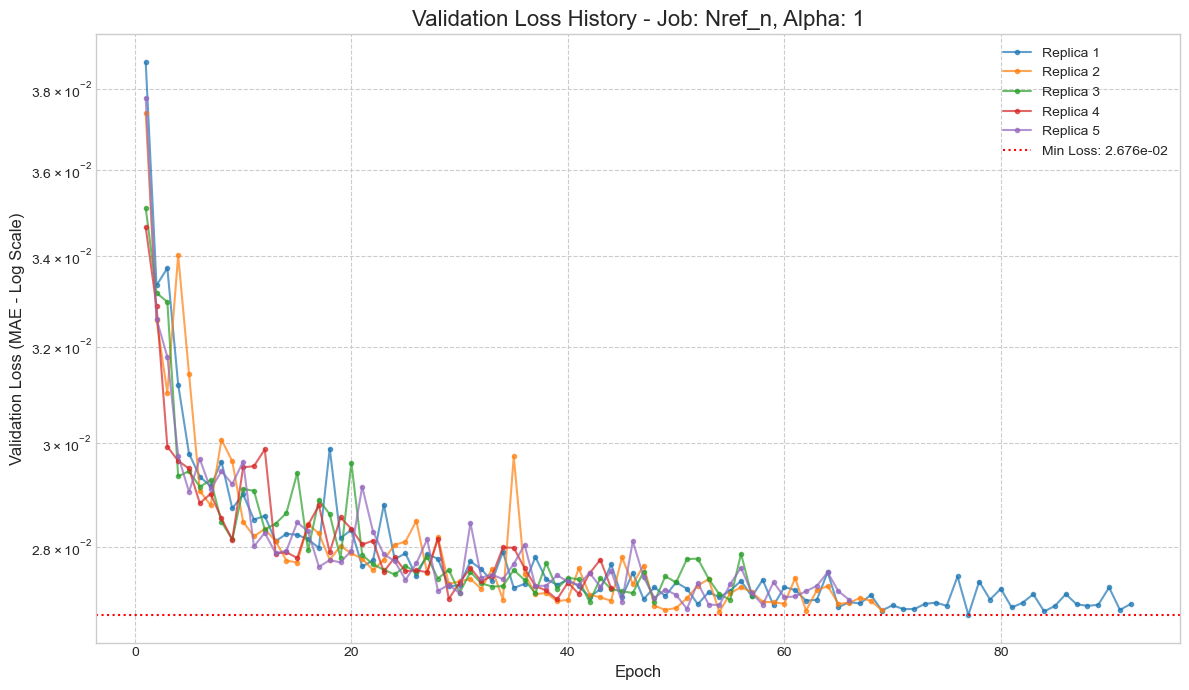

--- Plotting Validation Loss History for: Nref_rho_alpha0 ---
--- Looking in directory: trained_models_momenta\Nref_rho_alpha0 ---
  Loaded history for replica 1 (97 epochs)
  Loaded history for replica 2 (72 epochs)
  Loaded history for replica 3 (69 epochs)
  Loaded history for replica 4 (59 epochs)
  Loaded history for replica 5 (80 epochs)


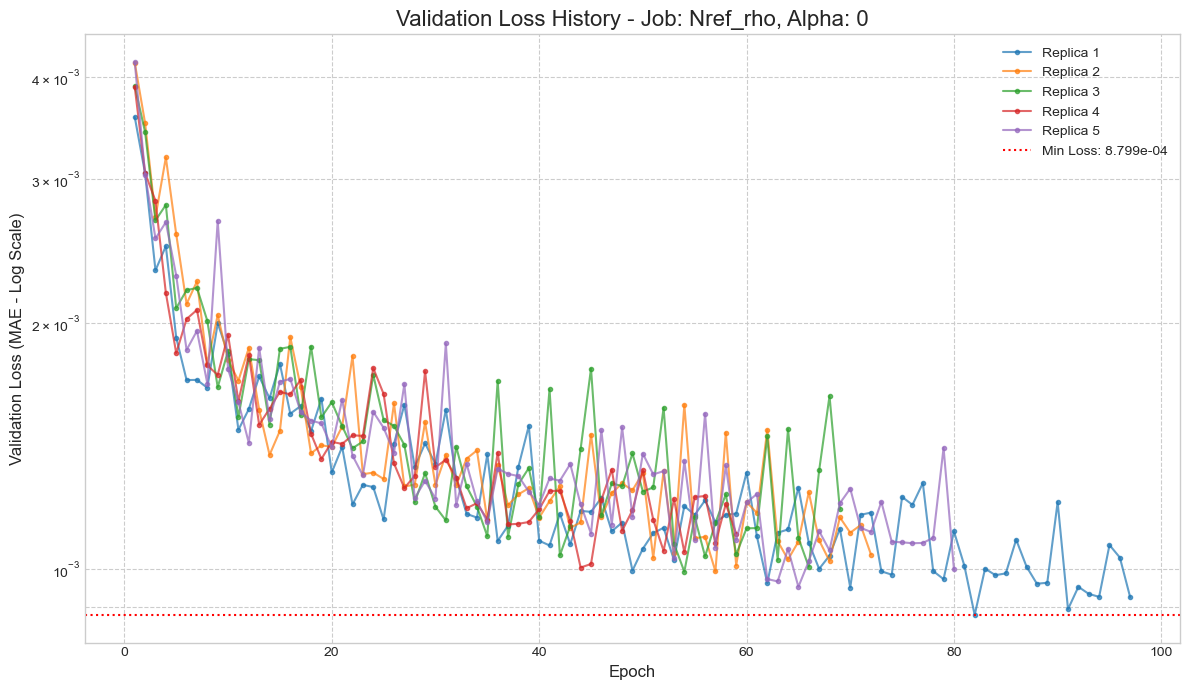

--- Plotting Validation Loss History for: Nref_rho_alpha1 ---
--- Looking in directory: trained_models_momenta\Nref_rho_alpha1 ---
  Loaded history for replica 1 (85 epochs)
  Loaded history for replica 2 (53 epochs)
  Loaded history for replica 3 (89 epochs)
  Loaded history for replica 4 (66 epochs)
  Loaded history for replica 5 (75 epochs)


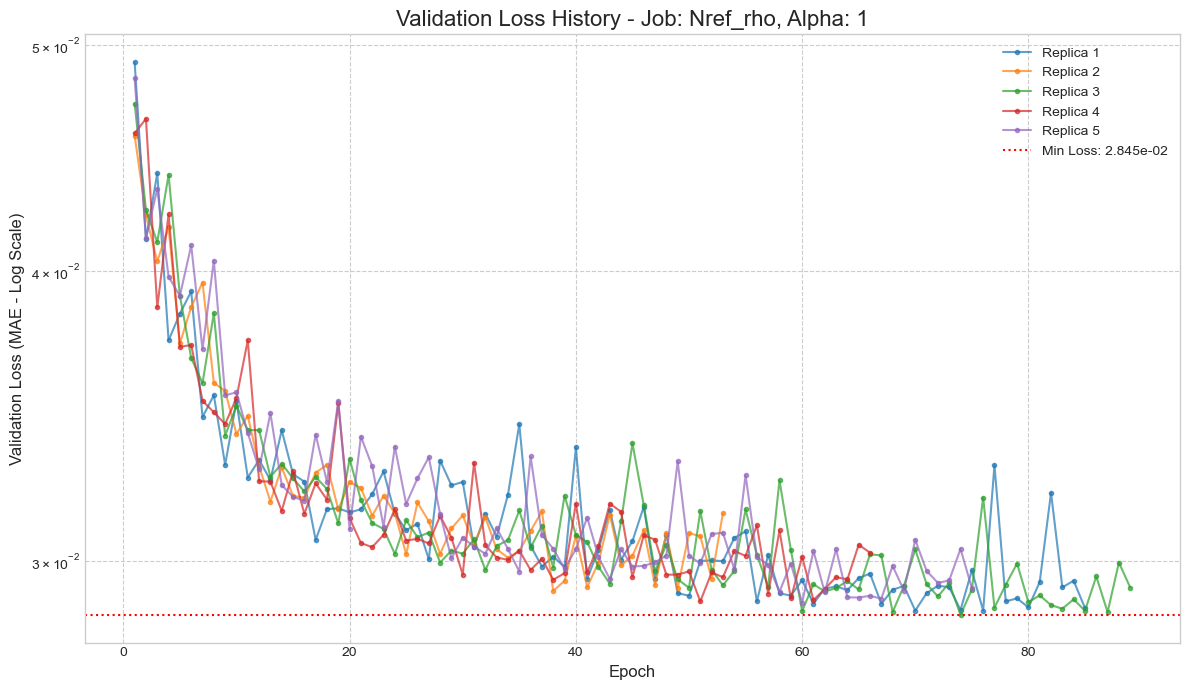

In [29]:
for job in JOB_DEFINITIONS:
    plot_loss_history(job) 

--- Plotting Validation Loss History for: Nmax ---
--- Looking in directory: trained_models_sigma44\Nmax ---
  Loaded history for replica 1 (83 epochs)
  Loaded history for replica 2 (73 epochs)
  Loaded history for replica 3 (31 epochs)
  Loaded history for replica 4 (73 epochs)
  Loaded history for replica 5 (45 epochs)


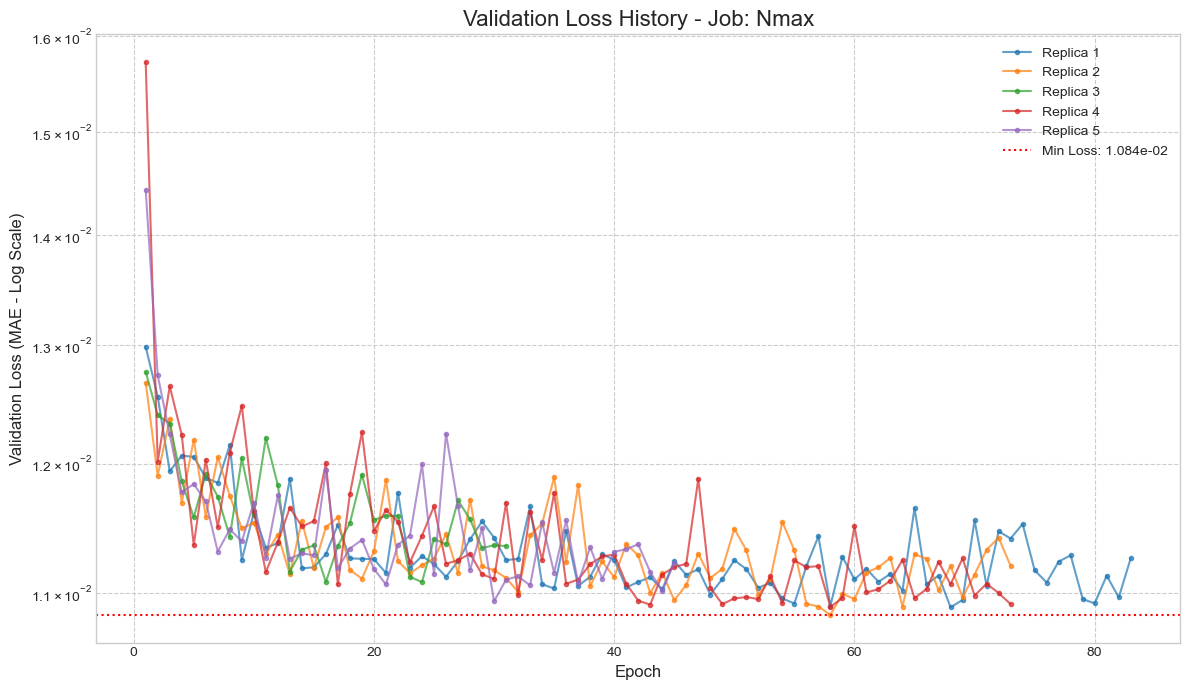

--- Plotting Validation Loss History for: Nref_b ---
--- Looking in directory: trained_models_sigma44\Nref_b ---
  Loaded history for replica 1 (59 epochs)
  Loaded history for replica 2 (53 epochs)
  Loaded history for replica 3 (68 epochs)
  Loaded history for replica 4 (31 epochs)
  Loaded history for replica 5 (30 epochs)


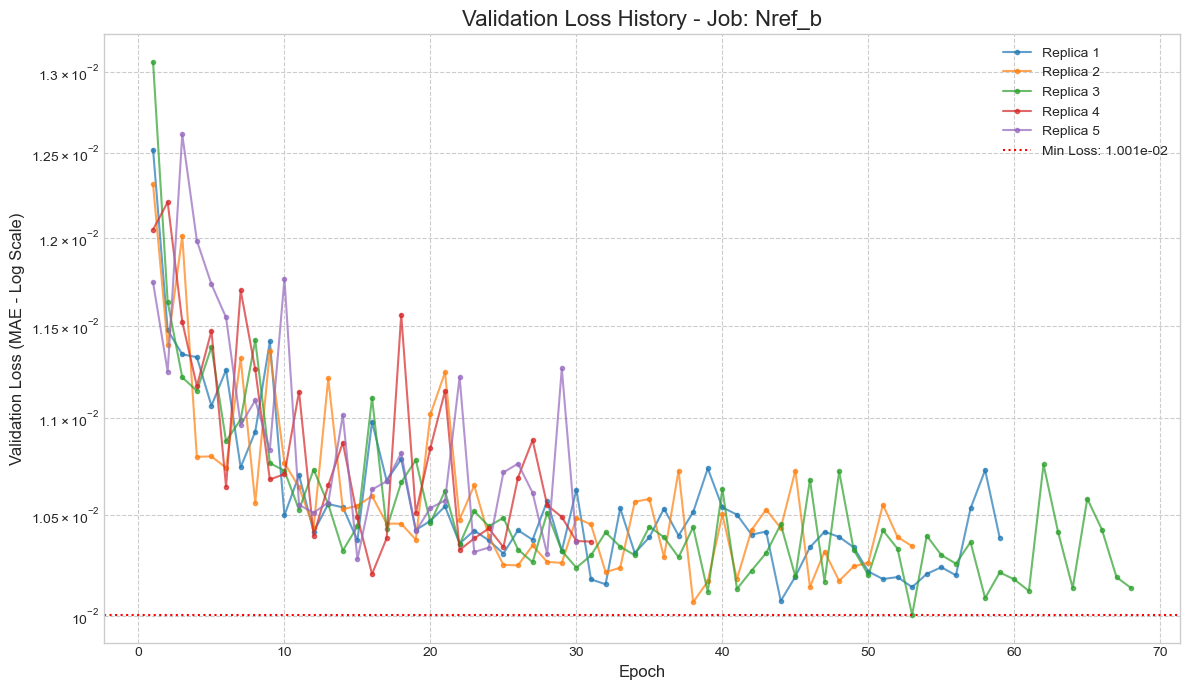

--- Plotting Validation Loss History for: Nref_n ---
--- Looking in directory: trained_models_sigma44\Nref_n ---
  Loaded history for replica 1 (38 epochs)
  Loaded history for replica 2 (46 epochs)
  Loaded history for replica 3 (66 epochs)
  Loaded history for replica 4 (53 epochs)
  Loaded history for replica 5 (41 epochs)


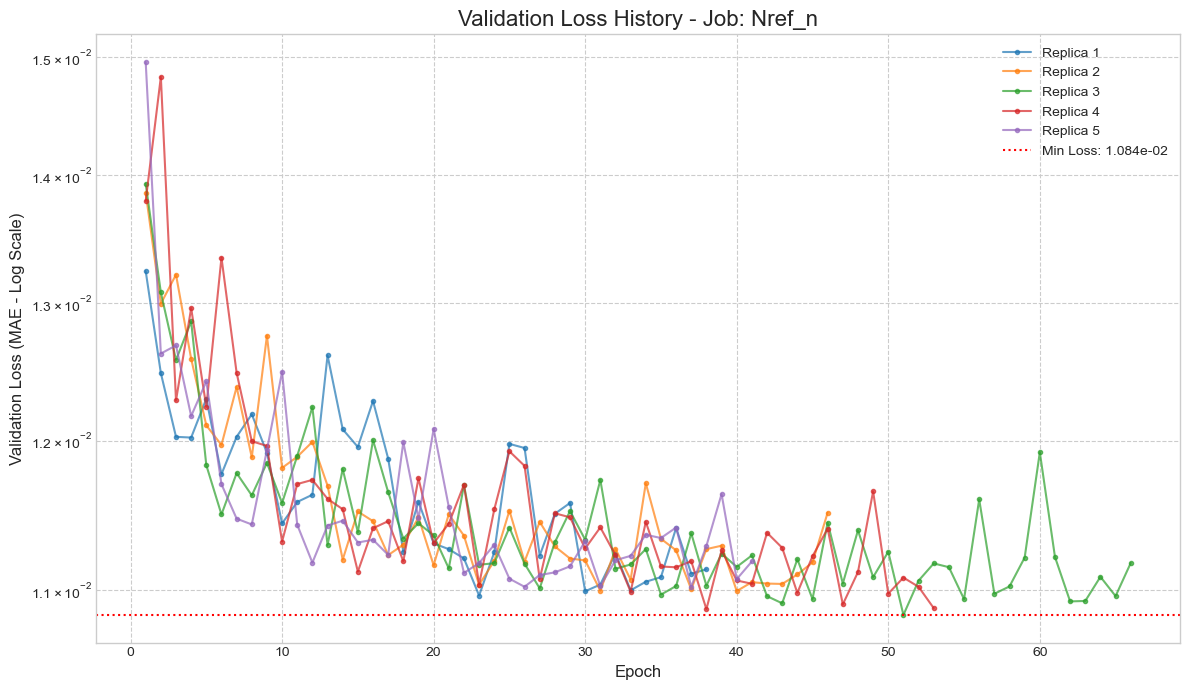

--- Plotting Validation Loss History for: Nref_rho ---
--- Looking in directory: trained_models_sigma44\Nref_rho ---
  Loaded history for replica 1 (60 epochs)
  Loaded history for replica 2 (43 epochs)
  Loaded history for replica 3 (111 epochs)
  Loaded history for replica 4 (70 epochs)
  Loaded history for replica 5 (70 epochs)


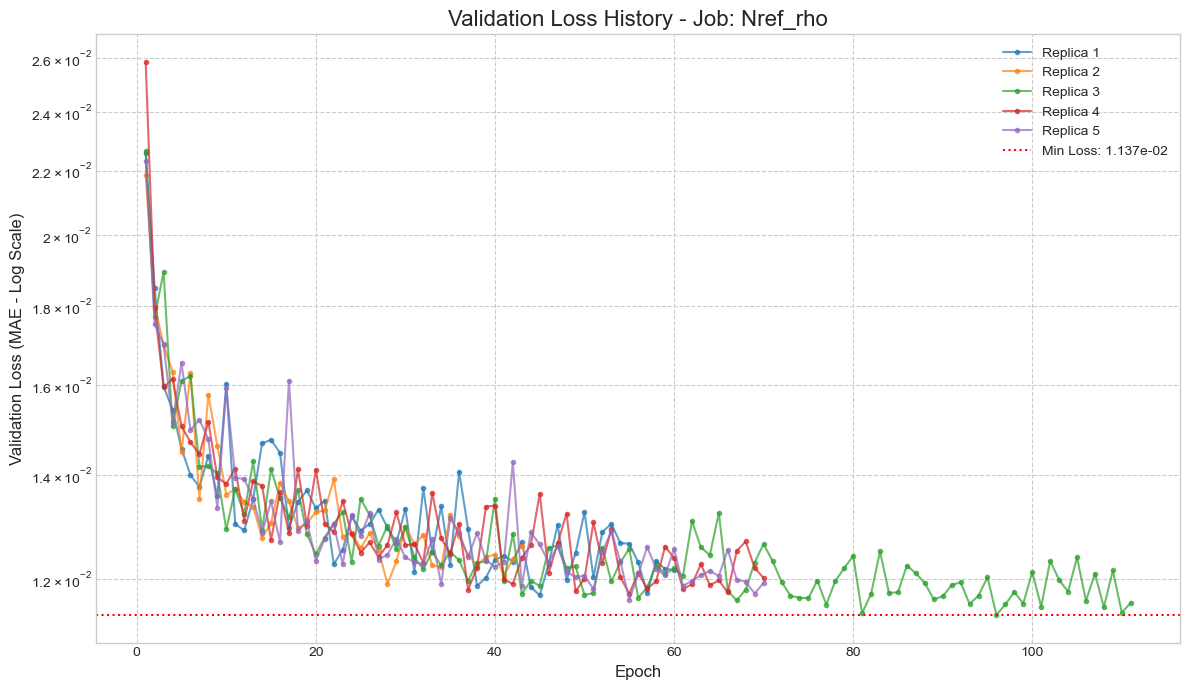

In [21]:
BASE_MODELS_DIR = "trained_models_sigma44"
JOB_DEFINITIONS = {
    "Nmax": {"label": "Nmax", "alpha": 0},
    "Nref_b": {"label": "Nref_b", "alpha": 0},
    "Nref_n": {"label": "Nref_n", "alpha": 0},
    "Nref_rho": {"label": "Nref_rho", "alpha": 0},
}
for job in JOB_DEFINITIONS:
    plot_loss_history(job, base_dir=BASE_MODELS_DIR) 

## Predictions

### Sigmas

#### Sigma = 0.44

In [22]:
def plot_prediction(path, filename=None):
    # Open the file
    run00 = h5py.File(path, 'r')
    
    # Extract all the data from the file
    energy_grid = run00['energy_grid_smeared'][:]
    predictions = run00['predictions'][:]
    rho_smeared = run00['true_smeared_rho'][:]
    rho_continuum = run00['unsmeared_continuum'][:]
    energy_continuum = run00['unsmeared_energy_grid'][:]
    A, m = run00['unsmeared_peak_amplitude'][()], run00['unsmeared_peak_mass'][()]

    # Calculate the central values
    final_mean = np.mean(predictions, axis=(0, 1))
    
    # Calculate the deltas
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    total_stat_error = np.sqrt(delta_latt**2 + delta_net**2)
    
    # Close the file 
    run00.close()
    plt.figure(figsize=(10, 6))
    plt.errorbar(energy_grid, final_mean, yerr=total_stat_error, capsize=3, fmt='o', markersize=3, ls='', c='tab:blue')
    plt.plot(energy_grid, rho_smeared, c='tab:blue')
    plt.plot(energy_continuum[:1000], rho_continuum[:1000], c='gray', alpha=0.5)
    plt.axvline(x=m, c='gray', ymin=0.05, label=r"$A\delta(E - m)$")
    plt.xlabel('E [Gev]', fontsize=14)
    plt.ylabel(r'$\hat{\rho}(E)$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    if filename:
        plt.savefig(filename)
    plt.show()

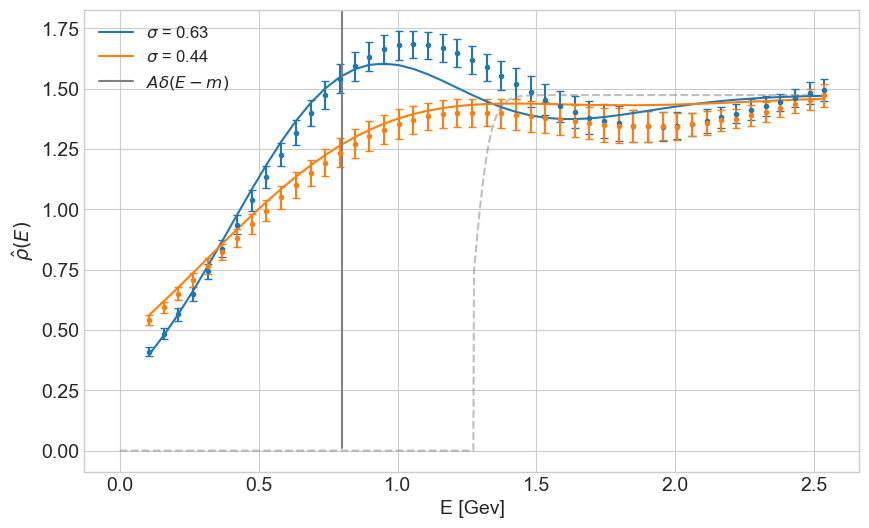

In [34]:
path1 = 'mock_predictions_sigma44/predictions_Nmax_sigma0.44.hdf5'
path2 = 'mock_predictions_sigma63/predictions_Nmax_sigma0.63.hdf5'

# Open the file
run01 = h5py.File(path1, 'r')
run02 = h5py.File(path2, 'r')

# Extract all the data from the file
energy_grid1 = run01['energy_grid_smeared'][:]
predictions1 = run01['predictions'][:]
rho_smeared1 = run01['true_smeared_rho'][:]
rho_continuum1 = run01['unsmeared_continuum'][:]
energy_continuum1 = run01['unsmeared_energy_grid'][:]
A1, m1 = run01['unsmeared_peak_amplitude'][()], run01['unsmeared_peak_mass'][()]

energy_grid2 = run02['energy_grid_smeared'][:]
predictions2 = run02['predictions'][:]
rho_smeared2 = run02['true_smeared_rho'][:]
rho_continuum2 = run02['unsmeared_continuum'][:]
energy_continuum2 = run02['unsmeared_energy_grid'][:]
A2, m2 = run02['unsmeared_peak_amplitude'][()], run02['unsmeared_peak_mass'][()]

# Calculate the central values
final_mean2 = np.mean(predictions2, axis=(0, 1))
final_mean1 = np.mean(predictions1, axis=(0, 1))

# Calculate the deltas
delta_latt1 = np.mean(np.std(predictions1, axis=0), axis=0)
delta_net1 = np.mean(np.std(predictions1, axis=1), axis=0)
total_stat_error1 = np.sqrt(delta_latt1**2 + delta_net1**2)

delta_latt2 = np.mean(np.std(predictions2, axis=0), axis=0)
delta_net2 = np.mean(np.std(predictions2, axis=1), axis=0)
total_stat_error2 = np.sqrt(delta_latt2**2 + delta_net1**2)

# Close the file 
run01.close()
run02.close()
plt.figure(figsize=(10, 6))
plt.errorbar(energy_grid1, final_mean1, yerr=total_stat_error1, capsize=3, fmt='o', markersize=3, ls='', c='tab:blue')
plt.errorbar(energy_grid2, final_mean2, yerr=total_stat_error2, capsize=3, fmt='o', markersize=3, ls='', c='tab:orange')
plt.plot(energy_grid1, rho_smeared1, label=r"$\sigma$ = 0.63", c='tab:blue')
plt.plot(energy_grid2, rho_smeared2, label=r"$\sigma$ = 0.44", c='tab:orange')
plt.plot(energy_continuum1[:1000], rho_continuum1[:1000], c='gray', ls='--', alpha=0.5)
plt.axvline(x=m1, c='gray', ymin=0.05, label=r"$A\delta(E - m)$")
plt.xlabel('E [Gev]', fontsize=14)
plt.ylabel(r'$\hat{\rho}(E)$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
if filename:
    plt.savefig('plots/delta_tanh.png')
plt.show()

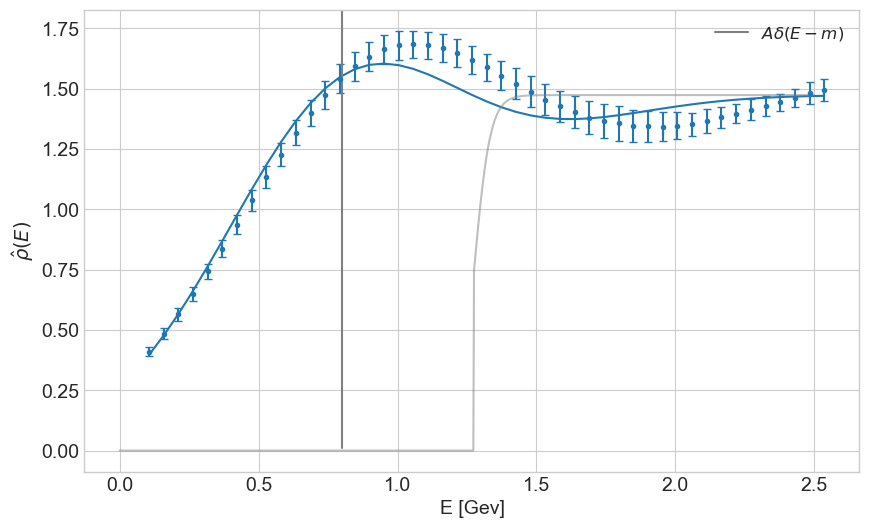

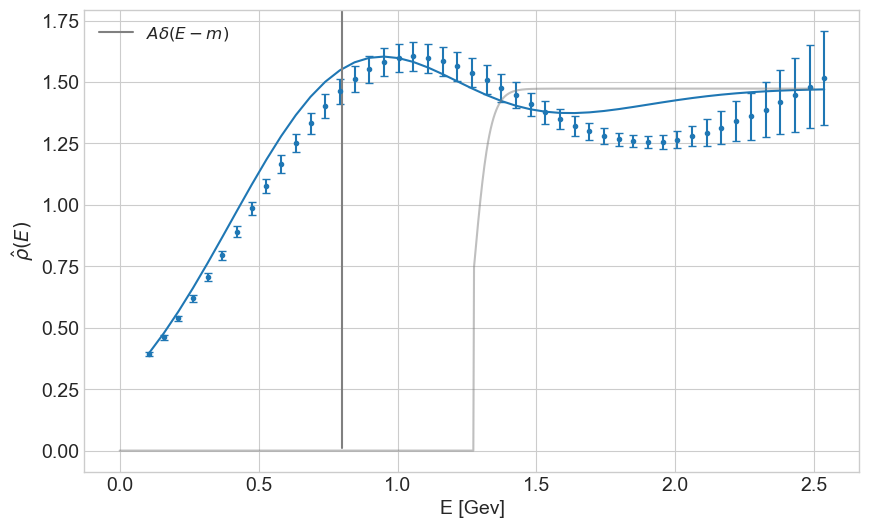

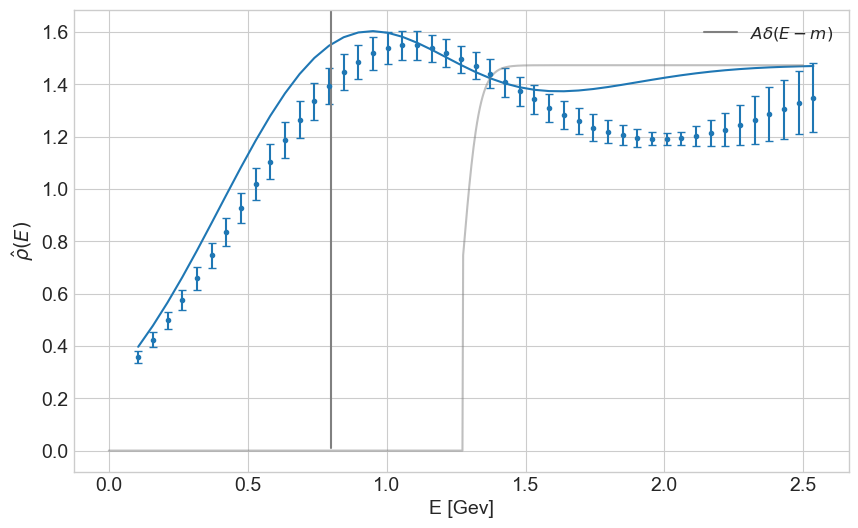

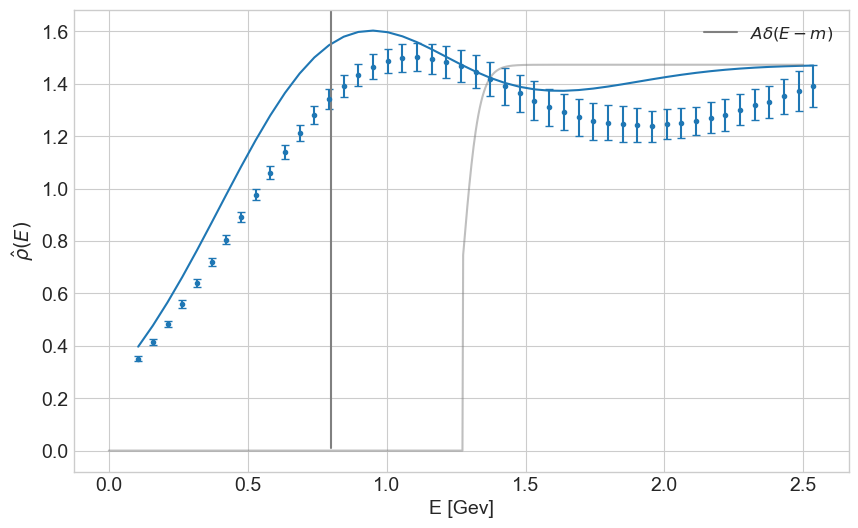

In [27]:
# Path to the predictions file
paths = {'mock_predictions_sigma44/predictions_Nmax_sigma0.44.hdf5' : 'plots/Nmax_sigma44.png',
         'mock_predictions_sigma44/predictions_Nref_b_sigma0.44.hdf5' : 'plots/Nref_b_sigma44.png',
         'mock_predictions_sigma44/predictions_Nref_n_sigma0.44.hdf5' : 'plots/Nref_n_sigma44.png',
         'mock_predictions_sigma44/predictions_Nref_rho_sigma0.44.hdf5' : 'plots/Nref_rho_sigma44.png'}

for path, filename in zip(paths.keys(), paths.values()):
    plot_prediction(path, filename)

In [25]:
paths.keys()

dict_keys(['mock_predictions_sigma44/predictions_Nmax_sigma0.44.hdf5', 'mock_predictions_sigma44/predictions_Nref_b_sigma0.44.hdf5', 'mock_predictions_sigma44/predictions_Nref_n_sigma0.44.hdf5', 'mock_predictions_sigma44/predictions_Nref_rho_sigma0.44.hdf5'])

In [87]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import os

# --- CONFIGURATION ---
# Point this to the directory where your prediction HDF5 files are stored
PREDICTIONS_DIR = "mock_predictions"
SIGMA = 0.44

# Define the job labels for the four runs
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}

# --- UTILITY FUNCTIONS ---

def calculate_mean_and_stat_error(predictions):
    """
    Calculates the mean prediction and total statistical error (Δ_stat)
    from a predictions array of shape (n_bootstrap, n_replicas, n_features).
    """
    # Final mean prediction is the average over both bootstrap and replica axes
    mean_pred = np.mean(predictions, axis=(0, 1))
    
    # Error from lattice noise (std dev over bootstrap, then mean over replicas)
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    
    # Error from network ensemble (std dev over replicas, then mean over bootstrap)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    
    # Total statistical error combined in quadrature
    delta_stat = np.sqrt(delta_latt**2 + delta_net**2)
    
    return mean_pred, delta_stat

def calculate_systematic_error(mean_final, stat_final, mean_ref, stat_ref):
    """
    Calculates the systematic error between a final and a reference result
    using the pull-weighted method from Eqs. 55 & 56 of the paper.
    """
    # Difference in central values
    abs_diff = np.abs(mean_final - mean_ref)
    
    # Denominator for the pull variable (combined stat errors)
    pull_denom = np.sqrt(stat_final**2 + stat_ref**2)
    # Avoid division by zero
    pull_denom[pull_denom < 1e-15] = 1e-15
    
    # Pull variable (Eq. 55)
    pull = abs_diff / pull_denom
    
    # Systematic error (Eq. 56)
    syst_error = abs_diff * erf(pull / np.sqrt(2))
    
    return syst_error

In [11]:
results = {}
    
# --- 1. Load data and calculate stat errors for all jobs ---
print("--- Loading prediction data for all jobs ---")
for role, label in job_labels.items():
    filepath = os.path.join(PREDICTIONS_DIR, f"predictions_{label}_sigma{SIGMA}.hdf5")
    try:
        with h5py.File(filepath, 'r') as f:
            predictions = f['predictions'][:]
            mean, stat_err = calculate_mean_and_stat_error(predictions)
            results[role] = {'mean': mean, 'stat_err': stat_err}
            print(f"  Successfully loaded and processed '{label}'")
    except FileNotFoundError:
        raise FileNotFoundError(f"Missing prediction file: {filepath}. Please run the prediction script for all jobs.")

# --- 2. Calculate Systematic Errors ---
print("\n--- Calculating systematic errors ---")

# The 'Nmax' run is our best result
final_result = results['final_result']

# Systematic error from basis size (N_b)
syst_err_b = calculate_systematic_error(
    final_result['mean'], final_result['stat_err'],
    results['ref_b']['mean'], results['ref_b']['stat_err']
)
print("  Calculated Δ_b (from basis size)")

# Systematic error from network size (N_n)
syst_err_n = calculate_systematic_error(
    final_result['mean'], final_result['stat_err'],
    results['ref_n']['mean'], results['ref_n']['stat_err']
)
print("  Calculated Δ_n (from network size)")

# Systematic error from training set size (N_rho)
syst_err_rho = calculate_systematic_error(
    final_result['mean'], final_result['stat_err'],
    results['ref_rho']['mean'], results['ref_rho']['stat_err']
)
print("  Calculated Δ_ρ (from training set size)")

# --- 3. Calculate Final Total Error ---
print("\n--- Combining errors for final result ---")

# Total error is stat + syst errors in quadrature (Eq. 57)
total_error = np.sqrt(
    final_result['stat_err']**2 + 
    syst_err_b**2 + 
    syst_err_n**2 + 
    syst_err_rho**2
)

# --- 4. Load Ground Truth for Plotting ---
with h5py.File(os.path.join(PREDICTIONS_DIR, f"predictions_{job_labels['final_result']}_sigma{SIGMA}.hdf5"), 'r') as f:
    energy_grid_smeared = f['energy_grid_smeared'][:]
    true_smeared_rho = f['true_smeared_rho'][:]
    unsmeared_continuum = f['unsmeared_continuum'][:]
    unsmeared_energy_grid = f['unsmeared_energy_grid'][:]
    peak_mass = f['unsmeared_peak_mass'][()]
    peak_amplitude = f['unsmeared_peak_amplitude'][()]
    
# --- 5. Final Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 2]})
fig.suptitle(f"Final Prediction and Error Analysis (σ={SIGMA} GeV)", fontsize=18)

# --- Main Plot ---
ax1 = axes[0]
# Plot the "true" smeared result
ax1.plot(energy_grid_smeared, true_smeared_rho, 'k-', lw=2.5, alpha=0.8, label='Ground Truth (Smeared)')
# Plot the final prediction with just statistical error
ax1.errorbar(energy_grid_smeared, final_result['mean'], yerr=final_result['stat_err'], 
             fmt='o', markersize=4, capsize=3, alpha=0.7, label='Prediction (Stat Error only)')
# Plot the final prediction with total error
ax1.errorbar(energy_grid_smeared, final_result['mean'], yerr=total_error, 
             fmt='none', ecolor='red', capsize=5, elinewidth=1.5, label='Prediction (Total Error)')
# Plot the unsmeared result
ax1.plot(unsmeared_energy_grid[:1000], unsmeared_continuum[:1000], c='gray', alpha=0.5, label='Ground Truth (Unsmeared)')
ax1.axvline(x=peak_mass, c='gray', ymin=0.05, label=r"$A\delta(E - m)$")

ax1.set_title("Prediction vs. Ground Truth", fontsize=14)
ax1.set_ylabel("$\\hat{\\rho}_{\\sigma}(E)$")
ax1.legend(fontsize=14)
ax1.grid(True)

# --- Error Budget Plot ---
ax2 = axes[1]
# To avoid division by zero, replace small mean values with a tiny number for plotting
plot_mean = np.where(np.abs(final_result['mean']) < 1e-9, 1e-9, final_result['mean'])

ax2.plot(energy_grid_smeared, np.abs(final_result['stat_err'] / plot_mean) * 100, 'o-', label='Stat Error (Δ_stat)')
ax2.plot(energy_grid_smeared, np.abs(syst_err_b / plot_mean) * 100, 's-', label='Syst: Basis (Δ_b)')
ax2.plot(energy_grid_smeared, np.abs(syst_err_n / plot_mean) * 100, '^-', label='Syst: Network (Δ_n)')
ax2.plot(energy_grid_smeared, np.abs(syst_err_rho / plot_mean) * 100, 'd-', label='Syst: Dataset (Δ_ρ)')
ax2.plot(energy_grid_smeared, np.abs(total_error / plot_mean) * 100, 'k--', lw=2, label='Total Error')
ax2.axvline(x=peak_mass, c='red', ymin=0.05, label=r"$A\delta(E - m)$")

ax2.set_title("Error Budget", fontsize=14)
ax2.set_xlabel("Energy E [GeV]")
ax2.set_ylabel("Relative Error (%)")
ax2.set_yscale('log')
ax2.legend(fontsize=14)
ax2.grid(True, which="both", ls="--")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('prediction.png')
plt.show()

--- Loading prediction data for all jobs ---


NameError: name 'PREDICTIONS_DIR' is not defined

Sigma=0.63

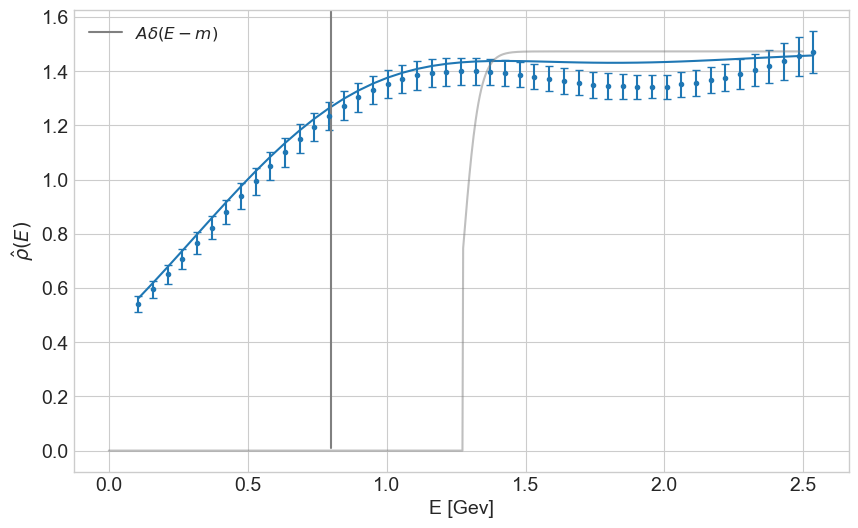

<Figure size 640x480 with 0 Axes>

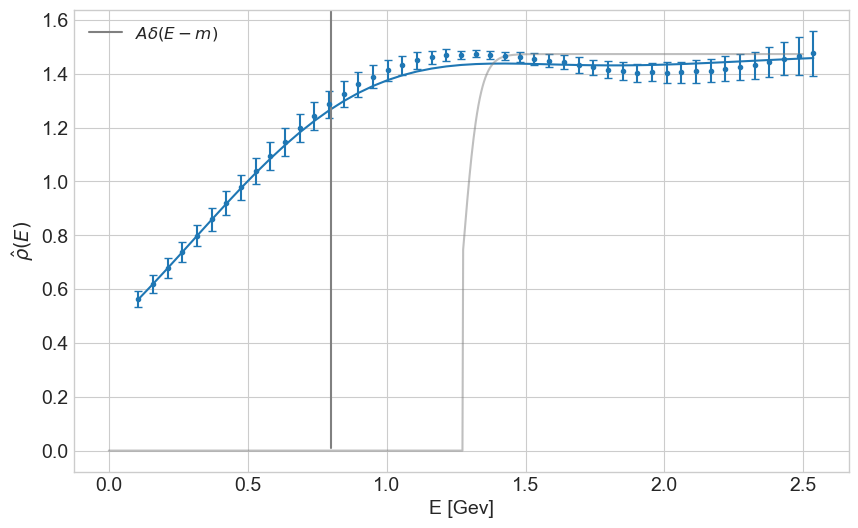

<Figure size 640x480 with 0 Axes>

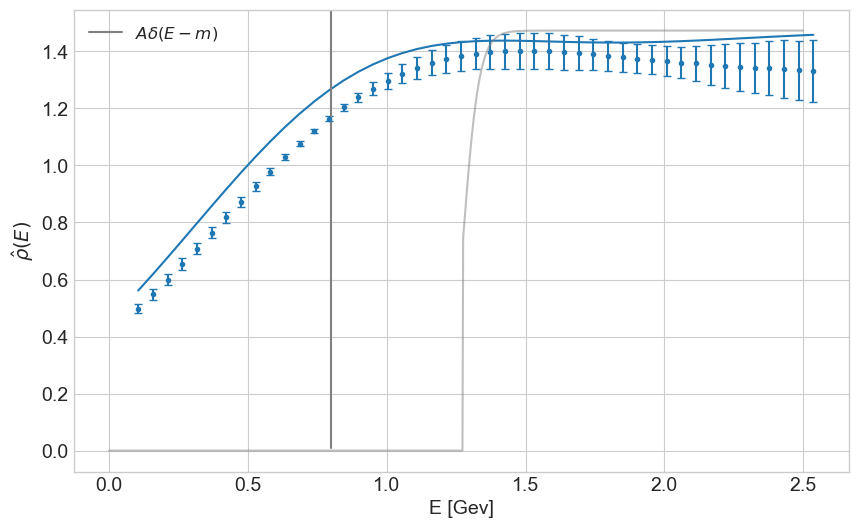

<Figure size 640x480 with 0 Axes>

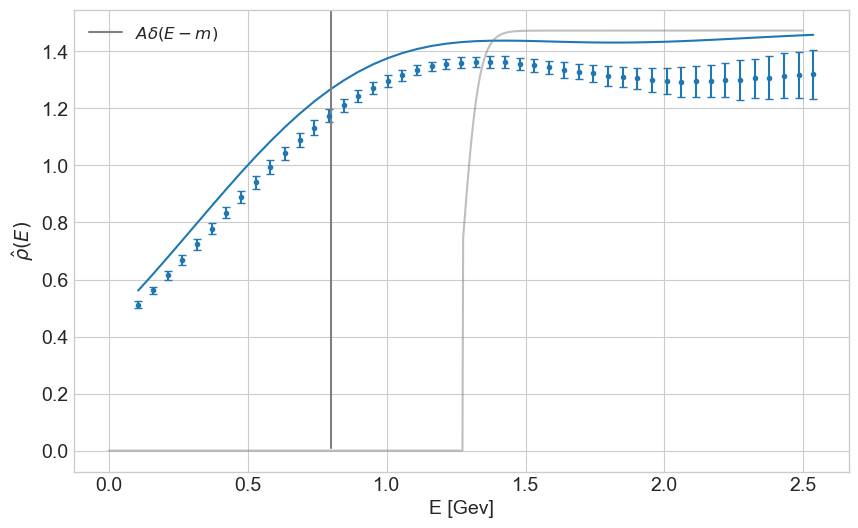

<Figure size 640x480 with 0 Axes>

In [8]:
# Path to the predictions file
paths = ['mock_predictions_sigma63/predictions_Nmax_sigma0.63.hdf5',
         'mock_predictions_sigma63/predictions_Nref_b_sigma0.63.hdf5',
         'mock_predictions_sigma63/predictions_Nref_n_sigma0.63.hdf5',
         'mock_predictions_sigma63/predictions_Nref_rho_sigma0.63.hdf5']

for i, path in enumerate(paths):
    plot_prediction(path)
    plt.savefig(f"plots/delta_tanh_preds_{i+1}_sigma0.63.png")

#### Predictions sigma=0.63

--- Loading prediction data for all jobs ---
  Successfully loaded and processed 'Nmax'
  Successfully loaded and processed 'Nref_b'
  Successfully loaded and processed 'Nref_n'
  Successfully loaded and processed 'Nref_rho'

--- Calculating systematic errors ---
  Calculated Δ_b (from basis size)
  Calculated Δ_n (from network size)
  Calculated Δ_ρ (from training set size)

--- Combining errors for final result ---


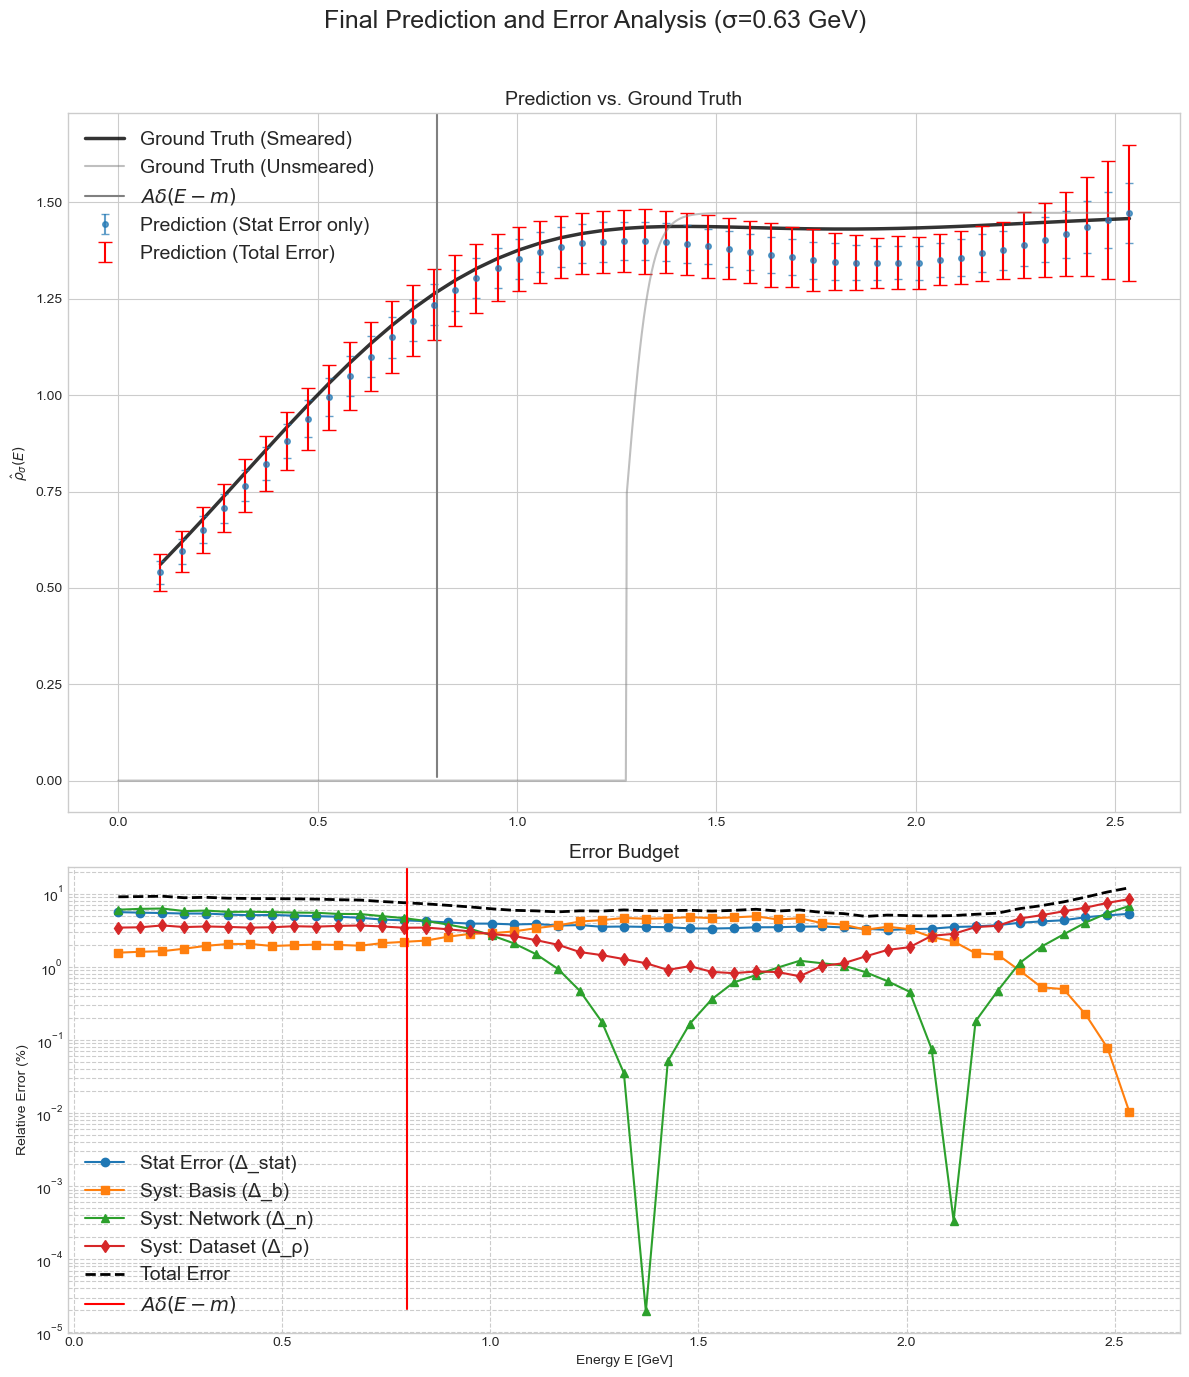

In [12]:
# --- CONFIGURATION ---
# Point this to the directory where your prediction HDF5 files are stored
PREDICTIONS_DIR = "mock_predictions_sigma63"
SIGMA = 0.63

# Define the job labels for the four runs
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}

results = {}
    
# --- 1. Load data and calculate stat errors for all jobs ---
print("--- Loading prediction data for all jobs ---")
for role, label in job_labels.items():
    filepath = os.path.join(PREDICTIONS_DIR, f"predictions_{label}_sigma{SIGMA}.hdf5")
    try:
        with h5py.File(filepath, 'r') as f:
            predictions = f['predictions'][:]
            mean, stat_err = calculate_mean_and_stat_error(predictions)
            results[role] = {'mean': mean, 'stat_err': stat_err}
            print(f"  Successfully loaded and processed '{label}'")
    except FileNotFoundError:
        raise FileNotFoundError(f"Missing prediction file: {filepath}. Please run the prediction script for all jobs.")

# --- 2. Calculate Systematic Errors ---
print("\n--- Calculating systematic errors ---")

# The 'Nmax' run is our best result
final_result = results['final_result']

# Systematic error from basis size (N_b)
syst_err_b = calculate_systematic_error(
    final_result['mean'], final_result['stat_err'],
    results['ref_b']['mean'], results['ref_b']['stat_err']
)
print("  Calculated Δ_b (from basis size)")

# Systematic error from network size (N_n)
syst_err_n = calculate_systematic_error(
    final_result['mean'], final_result['stat_err'],
    results['ref_n']['mean'], results['ref_n']['stat_err']
)
print("  Calculated Δ_n (from network size)")

# Systematic error from training set size (N_rho)
syst_err_rho = calculate_systematic_error(
    final_result['mean'], final_result['stat_err'],
    results['ref_rho']['mean'], results['ref_rho']['stat_err']
)
print("  Calculated Δ_ρ (from training set size)")

# --- 3. Calculate Final Total Error ---
print("\n--- Combining errors for final result ---")

# Total error is stat + syst errors in quadrature (Eq. 57)
total_error = np.sqrt(
    final_result['stat_err']**2 + 
    syst_err_b**2 + 
    syst_err_n**2 + 
    syst_err_rho**2
)

# --- 4. Load Ground Truth for Plotting ---
with h5py.File(os.path.join(PREDICTIONS_DIR, f"predictions_{job_labels['final_result']}_sigma{SIGMA}.hdf5"), 'r') as f:
    energy_grid_smeared = f['energy_grid_smeared'][:]
    true_smeared_rho = f['true_smeared_rho'][:]
    unsmeared_continuum = f['unsmeared_continuum'][:]
    unsmeared_energy_grid = f['unsmeared_energy_grid'][:]
    peak_mass = f['unsmeared_peak_mass'][()]
    peak_amplitude = f['unsmeared_peak_amplitude'][()]
    
# --- 5. Final Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 2]})
fig.suptitle(f"Final Prediction and Error Analysis (σ={SIGMA} GeV)", fontsize=18)

# --- Main Plot ---
ax1 = axes[0]
# Plot the "true" smeared result
ax1.plot(energy_grid_smeared, true_smeared_rho, 'k-', lw=2.5, alpha=0.8, label='Ground Truth (Smeared)')
# Plot the final prediction with just statistical error
ax1.errorbar(energy_grid_smeared, final_result['mean'], yerr=final_result['stat_err'], 
             fmt='o', markersize=4, capsize=3, alpha=0.7, label='Prediction (Stat Error only)')
# Plot the final prediction with total error
ax1.errorbar(energy_grid_smeared, final_result['mean'], yerr=total_error, 
             fmt='none', ecolor='red', capsize=5, elinewidth=1.5, label='Prediction (Total Error)')
# Plot the unsmeared result
ax1.plot(unsmeared_energy_grid[:1000], unsmeared_continuum[:1000], c='gray', alpha=0.5, label='Ground Truth (Unsmeared)')
ax1.axvline(x=peak_mass, c='gray', ymin=0.05, label=r"$A\delta(E - m)$")

ax1.set_title("Prediction vs. Ground Truth", fontsize=14)
ax1.set_ylabel("$\\hat{\\rho}_{\\sigma}(E)$")
ax1.legend(fontsize=14)
ax1.grid(True)

# --- Error Budget Plot ---
ax2 = axes[1]
# To avoid division by zero, replace small mean values with a tiny number for plotting
plot_mean = np.where(np.abs(final_result['mean']) < 1e-9, 1e-9, final_result['mean'])

ax2.plot(energy_grid_smeared, np.abs(final_result['stat_err'] / plot_mean) * 100, 'o-', label='Stat Error (Δ_stat)')
ax2.plot(energy_grid_smeared, np.abs(syst_err_b / plot_mean) * 100, 's-', label='Syst: Basis (Δ_b)')
ax2.plot(energy_grid_smeared, np.abs(syst_err_n / plot_mean) * 100, '^-', label='Syst: Network (Δ_n)')
ax2.plot(energy_grid_smeared, np.abs(syst_err_rho / plot_mean) * 100, 'd-', label='Syst: Dataset (Δ_ρ)')
ax2.plot(energy_grid_smeared, np.abs(total_error / plot_mean) * 100, 'k--', lw=2, label='Total Error')
ax2.axvline(x=peak_mass, c='red', ymin=0.05, label=r"$A\delta(E - m)$")

ax2.set_title("Error Budget", fontsize=14)
ax2.set_xlabel("Energy E [GeV]")
ax2.set_ylabel("Relative Error (%)")
ax2.set_yscale('log')
ax2.legend(fontsize=14)
ax2.grid(True, which="both", ls="--")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('prediction.png')
plt.show()


######################################################################
### ANALYZING SIGMA = 0.44 ###
######################################################################
--- Loading prediction data for sigma = 0.44 ---
  Successfully loaded and processed 'Nmax' for sigma=0.44
  Successfully loaded and processed 'Nref_b' for sigma=0.44
  Successfully loaded and processed 'Nref_n' for sigma=0.44
  Successfully loaded and processed 'Nref_rho' for sigma=0.44

--- Calculating systematic errors for sigma = 0.44 ---
--- Finished calculations for sigma = 0.44 ---

######################################################################
### ANALYZING SIGMA = 0.63 ###
######################################################################
--- Loading prediction data for sigma = 0.63 ---
  Successfully loaded and processed 'Nmax' for sigma=0.63
  Successfully loaded and processed 'Nref_b' for sigma=0.63
  Successfully loaded and processed 'Nref_n' for sigma=0.63
  Successfully loaded and process

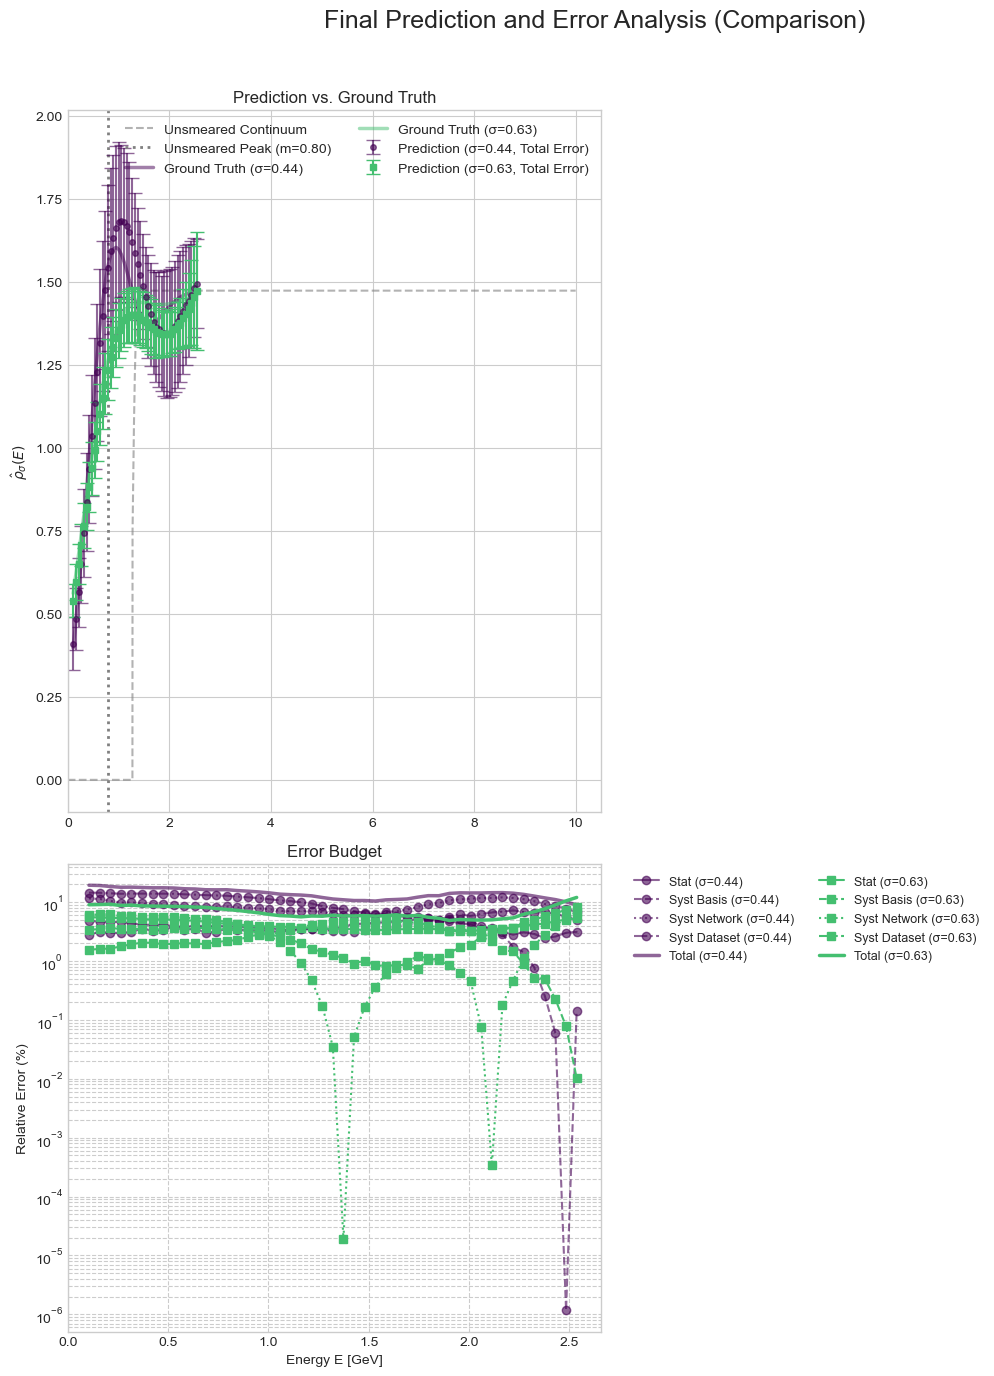

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import os

# --- CONFIGURATION ---
# Base directory where sigma-specific prediction folders are located
BASE_PREDICTIONS_DIR = "mock_predictions_sigma"
# List of sigmas to analyze and plot
SIGMAS_TO_ANALYZE = [0.44, 0.63]

# Define the job labels for the four runs
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}
# Output file for storing combined analysis results
OUTPUT_ANALYSIS_FILE = "final_analysis_results_both_sigmas.hdf5"

# --- UTILITY FUNCTIONS (Unchanged) ---
def calculate_mean_and_stat_error(predictions):
    mean_pred = np.mean(predictions, axis=(0, 1))
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    delta_stat = np.sqrt(delta_latt**2 + delta_net**2)
    return mean_pred, delta_stat

def calculate_systematic_error(mean_final, stat_final, mean_ref, stat_ref):
    abs_diff = np.abs(mean_final - mean_ref)
    pull_denom = np.sqrt(stat_final**2 + stat_ref**2)
    pull_denom[pull_denom < 1e-15] = 1e-15
    pull = abs_diff / pull_denom
    syst_error = abs_diff * erf(pull / np.sqrt(2))
    return syst_error

# --- MAIN ANALYSIS SCRIPT ---
if __name__ == '__main__':
    # Dictionary to store results for each sigma
    all_sigma_results = {}

    # --- Loop over each Sigma value ---
    for sigma in SIGMAS_TO_ANALYZE:
        print(f"\n{'#'*70}\n### ANALYZING SIGMA = {sigma} ###\n{'#'*70}")

        current_predictions_dir = f"{BASE_PREDICTIONS_DIR}{int(sigma*100)}"
        results_this_sigma = {}

        # --- 1. Load data and calculate stat errors for all jobs for this sigma ---
        print(f"--- Loading prediction data for sigma = {sigma} ---")
        found_all_files = True
        for role, label in job_labels.items():
            filepath = os.path.join(current_predictions_dir, f"predictions_{label}_sigma{sigma}.hdf5")
            try:
                with h5py.File(filepath, 'r') as f:
                    predictions = f['predictions'][:]
                    mean, stat_err = calculate_mean_and_stat_error(predictions)
                    results_this_sigma[role] = {'mean': mean, 'stat_err': stat_err}
                    # Load ground truth and energy grid from the first file found
                    # Use .get() with default to avoid error if key missing
                    if 'energy_grid_smeared' not in locals():
                         energy_grid_smeared = f.get('energy_grid_smeared')[:]
                    if 'true_smeared_rho' not in results_this_sigma:
                         results_this_sigma['true_rho'] = f.get('true_smeared_rho')[:]

                    # Load unsmeared components only once
                    if 'unsmeared_continuum' not in locals():
                         if 'unsmeared_continuum' in f:
                             unsmeared_continuum = f['unsmeared_continuum'][:]
                             unsmeared_energy_grid = f['unsmeared_energy_grid'][:]
                             peak_mass = f['unsmeared_peak_mass'][()]
                             peak_amplitude = f['unsmeared_peak_amplitude'][()]
                         else:
                             unsmeared_continuum, unsmeared_energy_grid, peak_mass, peak_amplitude = None, None, None, None

                    print(f"  Successfully loaded and processed '{label}' for sigma={sigma}")
            except FileNotFoundError:
                print(f"  ERROR: Missing prediction file: {filepath}. Cannot complete analysis for sigma={sigma}.")
                found_all_files = False
                break
            except Exception as e:
                 print(f"  ERROR loading {filepath}: {e}")
                 found_all_files = False
                 break

        if not found_all_files:
            continue

        # --- 2. Calculate Systematic Errors for this sigma ---
        print(f"\n--- Calculating systematic errors for sigma = {sigma} ---")
        final_result = results_this_sigma['final_result']
        syst_err_b = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_b']['mean'], results_this_sigma['ref_b']['stat_err'])
        syst_err_n = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_n']['mean'], results_this_sigma['ref_n']['stat_err'])
        syst_err_rho = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_rho']['mean'], results_this_sigma['ref_rho']['stat_err'])

        # --- 3. Calculate Final Total Error for this sigma ---
        total_error = np.sqrt(final_result['stat_err']**2 + syst_err_b**2 + syst_err_n**2 + syst_err_rho**2)

        # --- Store calculated errors for this sigma ---
        results_this_sigma['syst_err_b'] = syst_err_b
        results_this_sigma['syst_err_n'] = syst_err_n
        results_this_sigma['syst_err_rho'] = syst_err_rho
        results_this_sigma['total_error'] = total_error

        # Add results for this sigma to the main dictionary
        all_sigma_results[sigma] = results_this_sigma
        print(f"--- Finished calculations for sigma = {sigma} ---")

    # --- 4. Save Combined Analysis Results ---
    if all_sigma_results:
        print(f"\n--- Saving final analysis results to '{OUTPUT_ANALYSIS_FILE}' ---")
        with h5py.File(OUTPUT_ANALYSIS_FILE, 'w') as f:
            f.create_dataset('energy_grid_smeared', data=energy_grid_smeared)
            if unsmeared_continuum is not None:
                f.create_dataset('unsmeared_continuum', data=unsmeared_continuum)
                f.create_dataset('unsmeared_energy_grid', data=unsmeared_energy_grid)
                f.create_dataset('unsmeared_peak_mass', data=peak_mass)
                f.create_dataset('unsmeared_peak_amplitude', data=peak_amplitude)

            for sigma, results in all_sigma_results.items():
                sigma_group = f.create_group(f'sigma_{sigma}')
                sigma_group.create_dataset('final_prediction_mean', data=results['final_result']['mean'])
                sigma_group.create_dataset('final_prediction_stat_error', data=results['final_result']['stat_err'])
                sigma_group.create_dataset('final_prediction_syst_error_b', data=results['syst_err_b'])
                sigma_group.create_dataset('final_prediction_syst_error_n', data=results['syst_err_n'])
                sigma_group.create_dataset('final_prediction_syst_error_rho', data=results['syst_err_rho'])
                sigma_group.create_dataset('final_prediction_total_error', data=results['total_error'])
                if 'true_rho' in results: # Check if true_rho was loaded
                    sigma_group.create_dataset('true_smeared_rho', data=results['true_rho'])
        print("  Done saving analysis.")
    else:
        print("\nNo results were processed. Skipping saving and plotting.")
        exit()

    # --- 5. Final Visualization (Combined Plot) ---
    print("\n--- Generating final comparison plots ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [3, 2]})
    fig.suptitle("Final Prediction and Error Analysis (Comparison)", fontsize=18)

    ax1 = axes[0]
    ax2 = axes[1]
    colors = ['tab:blue', 'tab:orange']
    markers = ['o', 's']
    linestyles = ['-', '--', ':', '-.'] # Different linestyles for different errors

    # Plot unsmeared truth once if available
    if unsmeared_continuum is not None:
        ax1.plot(unsmeared_energy_grid[:1000], unsmeared_continuum[:1000], color='grey', linestyle='--', alpha=0.6, label='Unsmeared Continuum')
        ax1.axvline(x=peak_mass, color='grey', linestyle=':', ymin=0.05, linewidth=2, label=f'Unsmeared Peak (m={peak_mass:.2f})')

    for i, sigma in enumerate(SIGMAS_TO_ANALYZE):
        if sigma not in all_sigma_results: continue

        results = all_sigma_results[sigma]
        final_mean = results['final_result']['mean']
        stat_err = results['final_result']['stat_err']
        syst_b = results['syst_err_b']
        syst_n = results['syst_err_n']
        syst_rho = results['syst_err_rho']
        total_err = results['total_error']
        true_rho = results.get('true_rho', None) # Use .get() in case it wasn't loaded
        color = colors[i]
        marker = markers[i]

        # Set alpha for transparency
        plot_alpha = 0.6 if sigma == 0.44 else 1.0

        # --- Main Plot ---
        if true_rho is not None:
             ax1.plot(energy_grid_smeared, true_rho, '-', color=color, lw=2.5, alpha=0.5, label=f'Ground Truth (σ={sigma})')
        # Only plot error bars for the total error on the main plot for clarity
        ax1.errorbar(energy_grid_smeared, final_mean, yerr=total_err,
                     fmt=marker, markersize=4, color=color, ecolor=color, capsize=5, elinewidth=1.5,
                     alpha=plot_alpha, label=f'Prediction (σ={sigma}, Total Error)')

        # --- Error Budget Plot ---
        plot_mean = np.where(np.abs(final_mean) < 1e-9, 1e-9, final_mean)
        
        # Plot each error component separately
        ax2.plot(energy_grid_smeared, np.abs(stat_err / plot_mean) * 100, marker=marker, linestyle=linestyles[0], color=color, alpha=plot_alpha, label=f'Stat (σ={sigma})')
        ax2.plot(energy_grid_smeared, np.abs(syst_b / plot_mean) * 100, marker=marker, linestyle=linestyles[1], color=color, alpha=plot_alpha, label=f'Syst Basis (σ={sigma})')
        ax2.plot(energy_grid_smeared, np.abs(syst_n / plot_mean) * 100, marker=marker, linestyle=linestyles[2], color=color, alpha=plot_alpha, label=f'Syst Network (σ={sigma})')
        ax2.plot(energy_grid_smeared, np.abs(syst_rho / plot_mean) * 100, marker=marker, linestyle=linestyles[3], color=color, alpha=plot_alpha, label=f'Syst Dataset (σ={sigma})')
        ax2.plot(energy_grid_smeared, np.abs(total_err / plot_mean) * 100, marker=None, linestyle='-', color=color, lw=2.5, alpha=plot_alpha, label=f'Total (σ={sigma})')

    # Finalize Plots
    ax1.set_title("Prediction vs. Ground Truth")
    ax1.set_ylabel("$\\hat{\\rho}_{\\sigma}(E)$")
    ax1.legend(fontsize=10, ncol=2)
    ax1.grid(True)
    ax1.set_xlim(left=0)

    ax2.set_title("Error Budget")
    ax2.set_xlabel("Energy E [GeV]")
    ax2.set_ylabel("Relative Error (%)")
    ax2.set_yscale('log')
    # Make legend smaller and place outside
    ax2.legend(fontsize=9, ncol=2, bbox_to_anchor=(1.04, 1), loc='upper left')
    ax2.grid(True, which="both", ls="--")
    ax2.set_xlim(left=0)

    plt.tight_layout(rect=[0, 0, 0.85, 0.96]) # Adjust layout to make space for legend
    plt.savefig('prediction_comparison_full_errors.png')
    plt.show()


######################################################################
### ANALYZING SIGMA = 0.44 ###
######################################################################
--- Loading prediction data for sigma = 0.44 ---
  Successfully loaded and processed 'Nmax' for sigma=0.44
  Successfully loaded and processed 'Nref_b' for sigma=0.44
  Successfully loaded and processed 'Nref_n' for sigma=0.44
  Successfully loaded and processed 'Nref_rho' for sigma=0.44

--- Calculating systematic errors for sigma = 0.44 ---
--- Finished calculations for sigma = 0.44 ---

--- Generating comparison plot for sigma = 0.44 ---
  Plot saved to 'prediction_analysis_delta_tanh_sigma_0.44.png'


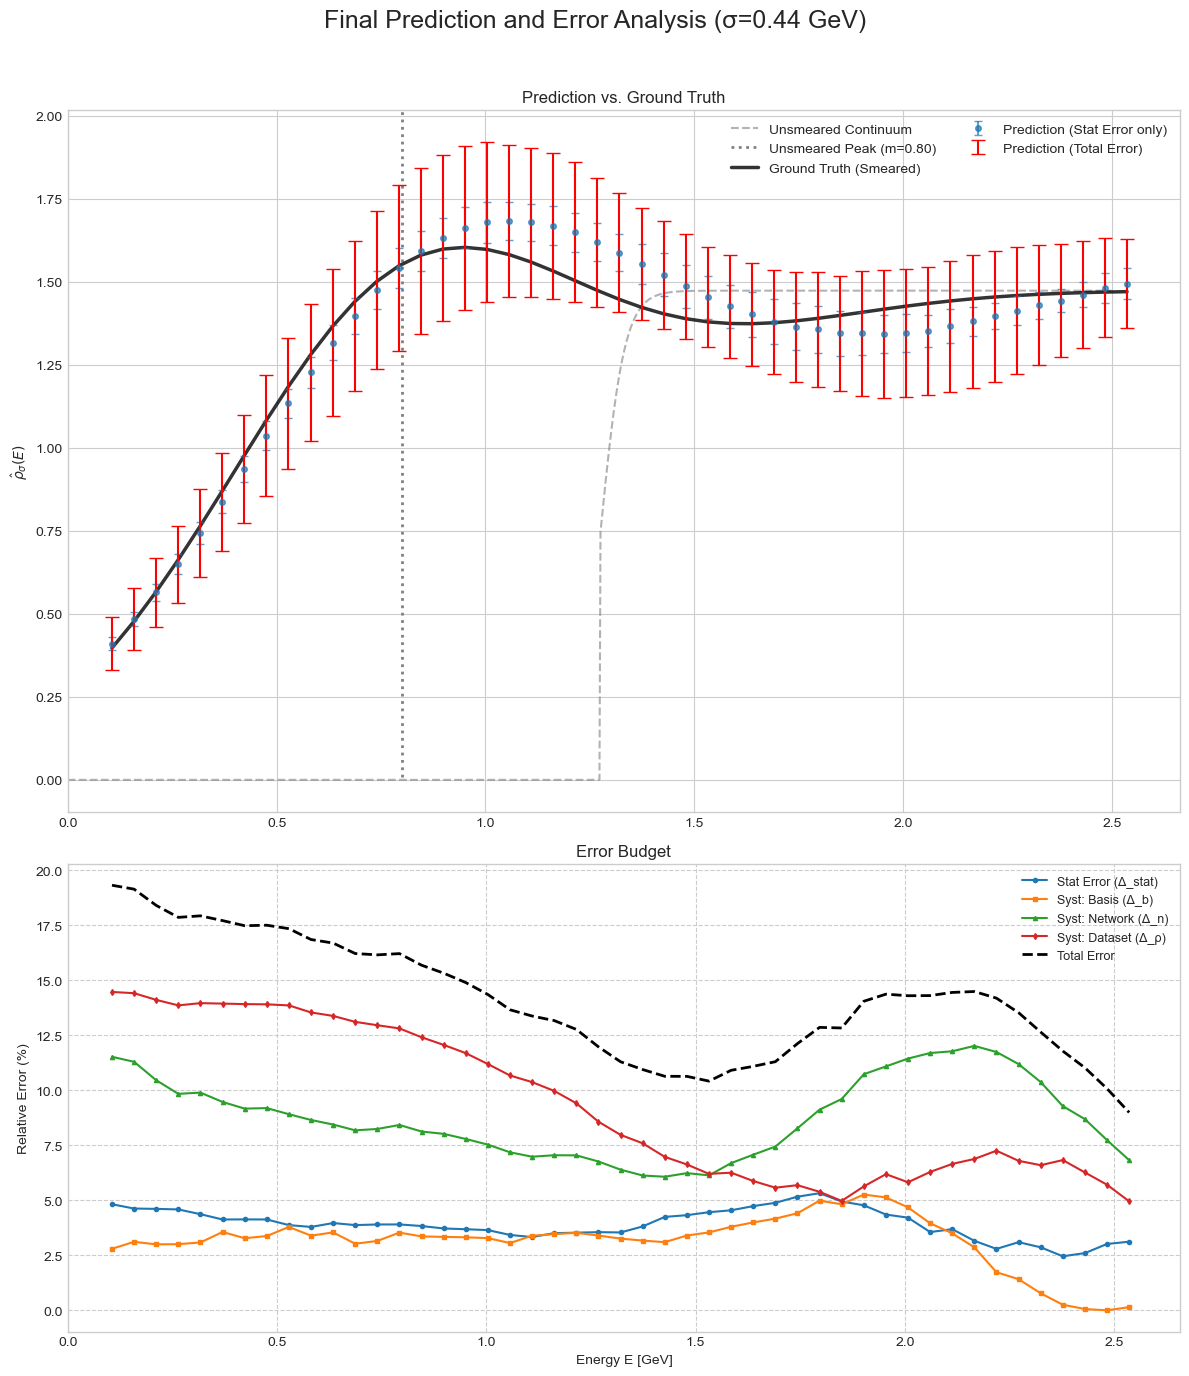


######################################################################
### ANALYZING SIGMA = 0.63 ###
######################################################################
--- Loading prediction data for sigma = 0.63 ---
  Successfully loaded and processed 'Nmax' for sigma=0.63
  Successfully loaded and processed 'Nref_b' for sigma=0.63
  Successfully loaded and processed 'Nref_n' for sigma=0.63
  Successfully loaded and processed 'Nref_rho' for sigma=0.63

--- Calculating systematic errors for sigma = 0.63 ---
--- Finished calculations for sigma = 0.63 ---

--- Generating comparison plot for sigma = 0.63 ---
  Plot saved to 'prediction_analysis_delta_tanh_sigma_0.63.png'


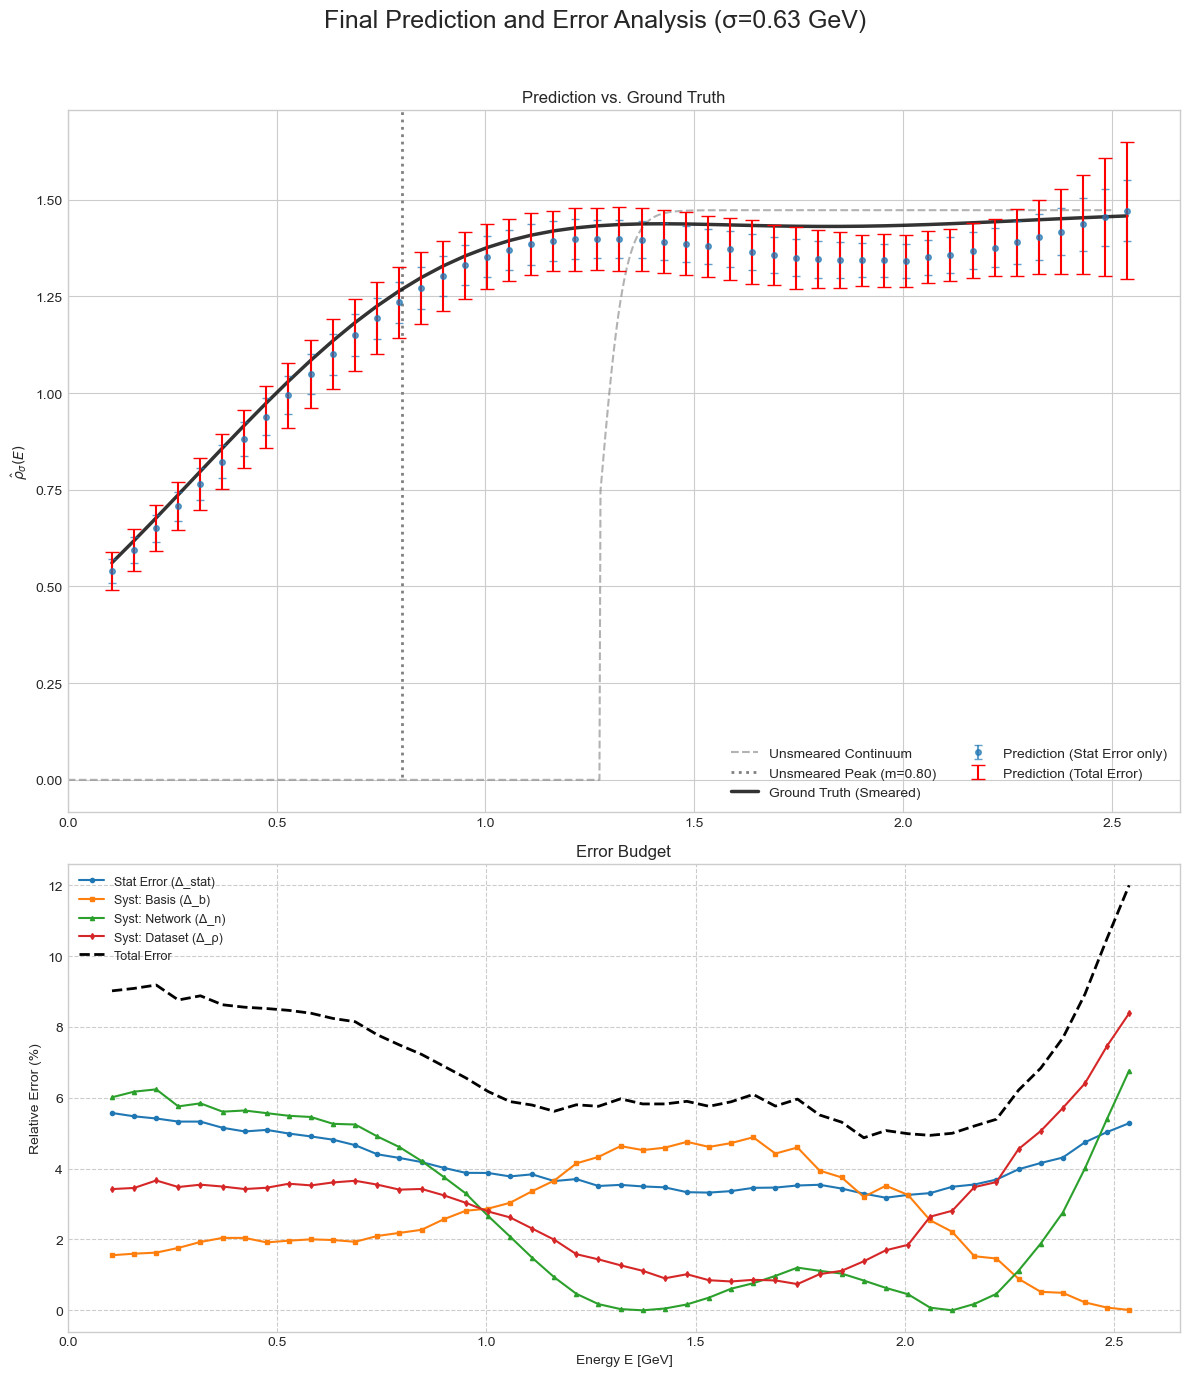


--- Saving final analysis results to 'final_analysis_results_both_sigmas.hdf5' ---
  Done saving analysis.

Analysis complete.


In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import os

# --- CONFIGURATION ---
# Base directory where sigma-specific prediction folders are located
BASE_PREDICTIONS_DIR = "mock_predictions_sigma"
# List of sigmas to analyze and plot
SIGMAS_TO_ANALYZE = [0.44, 0.63]

# Define the job labels for the four runs
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}
# Output file for storing combined analysis results
OUTPUT_ANALYSIS_FILE = "final_analysis_results_both_sigmas.hdf5"

# --- UTILITY FUNCTIONS (Unchanged) ---
def calculate_mean_and_stat_error(predictions):
    mean_pred = np.mean(predictions, axis=(0, 1))
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    delta_stat = np.sqrt(delta_latt**2 + delta_net**2)
    return mean_pred, delta_stat

def calculate_systematic_error(mean_final, stat_final, mean_ref, stat_ref):
    abs_diff = np.abs(mean_final - mean_ref)
    pull_denom = np.sqrt(stat_final**2 + stat_ref**2)
    pull_denom[pull_denom < 1e-15] = 1e-15
    pull = abs_diff / pull_denom
    syst_error = abs_diff * erf(pull / np.sqrt(2))
    return syst_error

# --- MAIN ANALYSIS SCRIPT ---
if __name__ == '__main__':
    # Dictionary to store results for each sigma
    all_sigma_results = {}
    energy_grid_smeared = None # Initialize
    unsmeared_continuum, unsmeared_energy_grid, peak_mass, peak_amplitude = None, None, None, None

    # --- Loop over each Sigma value ---
    for sigma in SIGMAS_TO_ANALYZE:
        print(f"\n{'#'*70}\n### ANALYZING SIGMA = {sigma} ###\n{'#'*70}")

        current_predictions_dir = f"{BASE_PREDICTIONS_DIR}{int(sigma*100)}"
        results_this_sigma = {}

        # --- 1. Load data and calculate stat errors for all jobs for this sigma ---
        print(f"--- Loading prediction data for sigma = {sigma} ---")
        found_all_files = True
        for role, label in job_labels.items():
            filepath = os.path.join(current_predictions_dir, f"predictions_{label}_sigma{sigma}.hdf5")
            try:
                with h5py.File(filepath, 'r') as f:
                    predictions = f['predictions'][:]
                    mean, stat_err = calculate_mean_and_stat_error(predictions)
                    results_this_sigma[role] = {'mean': mean, 'stat_err': stat_err}

                    # Load ground truth and energy grid from the first file found for this sigma
                    if energy_grid_smeared is None and 'energy_grid_smeared' in f:
                         energy_grid_smeared = f['energy_grid_smeared'][:]
                    if 'true_smeared_rho' not in results_this_sigma and 'true_smeared_rho' in f:
                         results_this_sigma['true_rho'] = f['true_smeared_rho'][:]

                    # Load unsmeared components only once (from any file)
                    if unsmeared_continuum is None and 'unsmeared_continuum' in f:
                         unsmeared_continuum = f['unsmeared_continuum'][:]
                         unsmeared_energy_grid = f['unsmeared_energy_grid'][:]
                         peak_mass = f['unsmeared_peak_mass'][()]
                         peak_amplitude = f['unsmeared_peak_amplitude'][()]

                    print(f"  Successfully loaded and processed '{label}' for sigma={sigma}")
            except FileNotFoundError:
                print(f"  ERROR: Missing prediction file: {filepath}. Cannot complete analysis for sigma={sigma}.")
                found_all_files = False
                break
            except Exception as e:
                 print(f"  ERROR loading {filepath}: {e}")
                 found_all_files = False
                 break

        if not found_all_files:
            continue

        # Check if essential data was loaded
        if energy_grid_smeared is None:
             print(f"  ERROR: Could not load 'energy_grid_smeared' for sigma={sigma}. Skipping...")
             continue
        if 'true_rho' not in results_this_sigma or results_this_sigma['true_rho'] is None:
             print(f"  ERROR: Could not load 'true_smeared_rho' for sigma={sigma}. Skipping...")
             continue


        # --- 2. Calculate Systematic Errors for this sigma ---
        print(f"\n--- Calculating systematic errors for sigma = {sigma} ---")
        final_result = results_this_sigma['final_result']
        syst_err_b = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_b']['mean'], results_this_sigma['ref_b']['stat_err'])
        syst_err_n = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_n']['mean'], results_this_sigma['ref_n']['stat_err'])
        syst_err_rho = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_rho']['mean'], results_this_sigma['ref_rho']['stat_err'])

        # --- 3. Calculate Final Total Error for this sigma ---
        total_error = np.sqrt(final_result['stat_err']**2 + syst_err_b**2 + syst_err_n**2 + syst_err_rho**2)

        # --- Store calculated errors for this sigma ---
        results_this_sigma['syst_err_b'] = syst_err_b
        results_this_sigma['syst_err_n'] = syst_err_n
        results_this_sigma['syst_err_rho'] = syst_err_rho
        results_this_sigma['total_error'] = total_error

        # Add results for this sigma to the main dictionary
        all_sigma_results[sigma] = results_this_sigma
        print(f"--- Finished calculations for sigma = {sigma} ---")

        # --- 4. Generate Separate Plot for this Sigma ---
        print(f"\n--- Generating comparison plot for sigma = {sigma} ---")
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, axes = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 2]})
        fig.suptitle(f"Final Prediction and Error Analysis (σ={sigma} GeV)", fontsize=18)

        ax1 = axes[0]
        ax2 = axes[1]
        results = results_this_sigma # Use data specific to this sigma
        final_mean = results['final_result']['mean']
        stat_err = results['final_result']['stat_err']
        syst_b = results['syst_err_b']
        syst_n = results['syst_err_n']
        syst_rho = results['syst_err_rho']
        total_err = results['total_error']
        true_rho = results.get('true_rho', None)

        # Plot unsmeared truth once if available
        if unsmeared_continuum is not None:
            ax1.plot(unsmeared_energy_grid[:1000], unsmeared_continuum[:1000], color='grey', linestyle='--', alpha=0.6, label='Unsmeared Continuum')
            ax1.axvline(x=peak_mass, color='grey', linestyle=':', linewidth=2, ymin=0.05, label=f'Unsmeared Peak (m={peak_mass:.2f})')

        # --- Main Plot (Prediction vs Truth) ---
        if true_rho is not None:
            ax1.plot(energy_grid_smeared, true_rho, 'k-', lw=2.5, alpha=0.8, label='Ground Truth (Smeared)')
        ax1.errorbar(energy_grid_smeared, final_mean, yerr=stat_err,
                     fmt='o', markersize=4, capsize=3, alpha=0.7, label='Prediction (Stat Error only)')
        ax1.errorbar(energy_grid_smeared, final_mean, yerr=total_err,
                     fmt='none', ecolor='red', capsize=5, elinewidth=1.5, label='Prediction (Total Error)')

        ax1.set_title("Prediction vs. Ground Truth")
        ax1.set_ylabel("$\\hat{\\rho}_{\\sigma}(E)$")
        ax1.legend(fontsize=10, ncol=2)
        ax1.grid(True)
        ax1.set_xlim(left=0)

        # --- Error Budget Plot (Full Detail) ---
        plot_mean = np.where(np.abs(final_mean) < 1e-9, 1e-9, final_mean)
        ax2.plot(energy_grid_smeared, np.abs(stat_err / plot_mean) * 100, 'o-', markersize=3, label='Stat Error (Δ_stat)')
        ax2.plot(energy_grid_smeared, np.abs(syst_b / plot_mean) * 100, 's-', markersize=3, label='Syst: Basis (Δ_b)')
        ax2.plot(energy_grid_smeared, np.abs(syst_n / plot_mean) * 100, '^-', markersize=3, label='Syst: Network (Δ_n)')
        ax2.plot(energy_grid_smeared, np.abs(syst_rho / plot_mean) * 100, 'd-', markersize=3, label='Syst: Dataset (Δ_ρ)')
        ax2.plot(energy_grid_smeared, np.abs(total_err / plot_mean) * 100, 'k--', lw=2, label='Total Error')

        ax2.set_title("Error Budget")
        ax2.set_xlabel("Energy E [GeV]")
        ax2.set_ylabel("Relative Error (%)")
        #ax2.set_yscale('log')
        ax2.legend(fontsize=9)
        ax2.grid(True, which="both", ls="--")
        ax2.set_xlim(left=0)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plot_filename = f'prediction_analysis_delta_tanh_sigma_{sigma}.png'
        plt.savefig(plot_filename)
        print(f"  Plot saved to '{plot_filename}'")
        plt.show() # Close the figure to avoid showing all at the end

    # --- 5. Save Combined Analysis Results to HDF5 ---
    if all_sigma_results:
        print(f"\n--- Saving final analysis results to '{OUTPUT_ANALYSIS_FILE}' ---")
        with h5py.File(OUTPUT_ANALYSIS_FILE, 'w') as f:
            f.create_dataset('energy_grid_smeared', data=energy_grid_smeared)
            if unsmeared_continuum is not None:
                f.create_dataset('unsmeared_continuum', data=unsmeared_continuum)
                f.create_dataset('unsmeared_energy_grid', data=unsmeared_energy_grid)
                f.create_dataset('unsmeared_peak_mass', data=peak_mass)
                f.create_dataset('unsmeared_peak_amplitude', data=peak_amplitude)

            for sigma, results in all_sigma_results.items():
                sigma_group = f.create_group(f'sigma_{sigma}')
                sigma_group.create_dataset('final_prediction_mean', data=results['final_result']['mean'])
                sigma_group.create_dataset('final_prediction_stat_error', data=results['final_result']['stat_err'])
                sigma_group.create_dataset('final_prediction_syst_error_b', data=results['syst_err_b'])
                sigma_group.create_dataset('final_prediction_syst_error_n', data=results['syst_err_n'])
                sigma_group.create_dataset('final_prediction_syst_error_rho', data=results['syst_err_rho'])
                sigma_group.create_dataset('final_prediction_total_error', data=results['total_error'])
                if 'true_rho' in results and results['true_rho'] is not None:
                    sigma_group.create_dataset('true_smeared_rho', data=results['true_rho'])
        print("  Done saving analysis.")
    else:
        print("\nNo results were processed. Skipping saving.")

    print("\nAnalysis complete.")

O(3) non-linear sigma model Mock Dataset 

In [1]:
import h5py
import pandas as pd
import numpy as np
import os

path = "O3_mock_predictions_sigma/O3_predictions_Nmax_sigma0.44.hdf5"
run00 = h5py.File(path, 'r')

In [2]:
run00.keys()

<KeysViewHDF5 ['energy_grid_smeared', 'predictions', 'true_smeared_rho', 'unsmeared_energy_grid', 'unsmeared_rho_o3']>

In [7]:
run00['energy_grid_smeared'][:]

array([0.10566, 0.15849, 0.21132, 0.26415, 0.31698, 0.36981, 0.42264,
       0.47547, 0.5283 , 0.58113, 0.63396, 0.68679, 0.73962, 0.79245,
       0.84528, 0.89811, 0.95094, 1.00377, 1.0566 , 1.10943, 1.16226,
       1.21509, 1.26792, 1.32075, 1.37358, 1.42641, 1.47924, 1.53207,
       1.5849 , 1.63773, 1.69056, 1.74339, 1.79622, 1.84905, 1.90188,
       1.95471, 2.00754, 2.06037, 2.1132 , 2.16603, 2.21886, 2.27169,
       2.32452, 2.37735, 2.43018, 2.48301, 2.53584])


######################################################################
### ANALYZING SIGMA = 0.44 ###
######################################################################
--- Loading prediction data for sigma = 0.44 ---
  Successfully loaded and processed 'Nmax' for sigma=0.44
  Successfully loaded and processed 'Nref_b' for sigma=0.44
  Successfully loaded and processed 'Nref_n' for sigma=0.44
  Successfully loaded and processed 'Nref_rho' for sigma=0.44

--- Calculating systematic errors for sigma = 0.44 ---
--- Finished calculations for sigma = 0.44 ---

######################################################################
### ANALYZING SIGMA = 0.63 ###
######################################################################
--- Loading prediction data for sigma = 0.63 ---
  Successfully loaded and processed 'Nmax' for sigma=0.63
  Successfully loaded and processed 'Nref_b' for sigma=0.63
  Successfully loaded and processed 'Nref_n' for sigma=0.63
  Successfully loaded and process

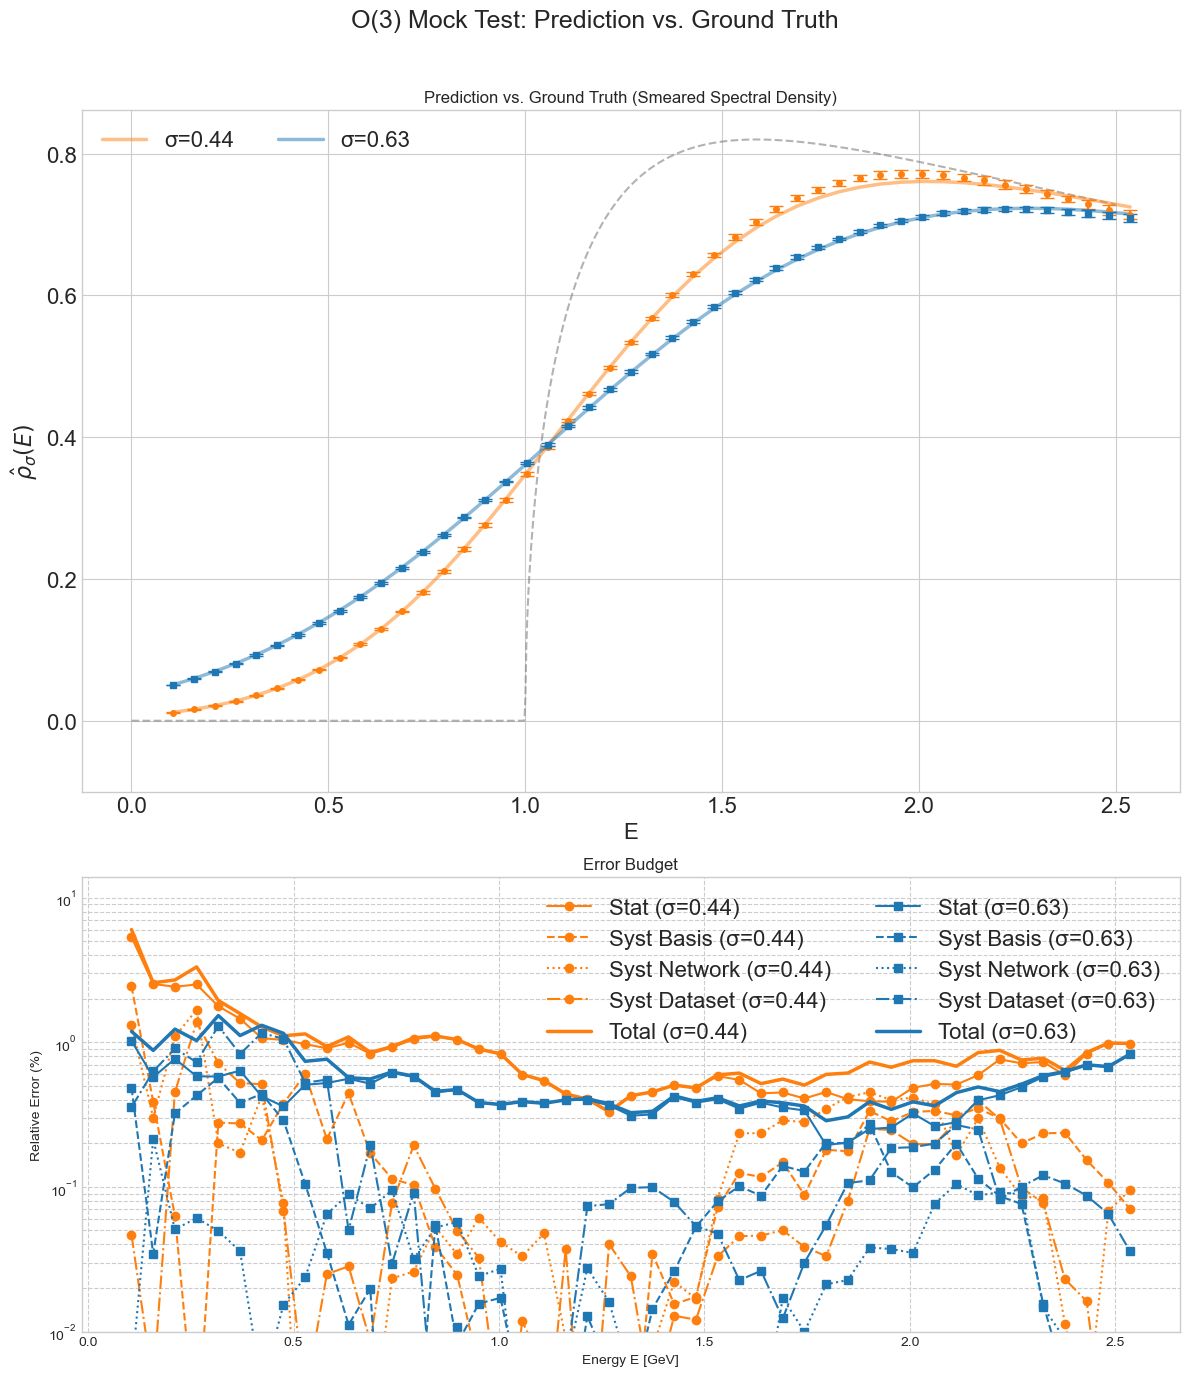

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import os

# --- CONFIGURATION ---
BASE_PREDICTIONS_DIR = "O3_mock_predictions_sigma"
SIGMAS_TO_ANALYZE = [0.44, 0.63]
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}
OUTPUT_ANALYSIS_FILE = "final_analysis_results_O3_mock.hdf5"

# --- UTILITY FUNCTIONS (Unchanged) ---
def calculate_mean_and_stat_error(predictions):
    mean_pred = np.mean(predictions, axis=(0, 1))
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    delta_stat = np.sqrt(delta_latt**2 + delta_net**2)
    return mean_pred, delta_stat

def calculate_systematic_error(mean_final, stat_final, mean_ref, stat_ref):
    abs_diff = np.abs(mean_final - mean_ref)
    pull_denom = np.sqrt(stat_final**2 + stat_ref**2)
    pull_denom[pull_denom < 1e-15] = 1e-15
    pull = abs_diff / pull_denom
    syst_error = abs_diff * erf(pull / np.sqrt(2))
    return syst_error

# --- MAIN ANALYSIS SCRIPT ---
if __name__ == '__main__':
    all_sigma_results = {}
    energy_grid_smeared = None
    unsmeared_rho_o3, unsmeared_energy_grid, o3_eth = None, None, None

    for sigma in SIGMAS_TO_ANALYZE:
        print(f"\n{'#'*70}\n### ANALYZING SIGMA = {sigma} ###\n{'#'*70}")
        current_predictions_dir = BASE_PREDICTIONS_DIR
        results_this_sigma = {}
        found_all_files = True

        print(f"--- Loading prediction data for sigma = {sigma} ---")
        for role, label in job_labels.items():
            filepath = os.path.join(current_predictions_dir, f"O3_predictions_{label}_sigma{sigma}.hdf5")
            try:
                with h5py.File(filepath, 'r') as f:
                    predictions = f['predictions'][:]
                    mean, stat_err = calculate_mean_and_stat_error(predictions)
                    results_this_sigma[role] = {'mean': mean, 'stat_err': stat_err}

                    # --- THIS IS THE FIX ---
                    # Try to load essential grids/data from EVERY file until successful
                    if energy_grid_smeared is None and 'energy_grid_smeared' in f:
                         energy_grid_smeared = f['energy_grid_smeared'][:]
                    if 'true_smeared_rho' not in results_this_sigma and 'true_smeared_rho' in f:
                         results_this_sigma['true_rho'] = f['true_smeared_rho'][:]
                    if unsmeared_rho_o3 is None and 'unsmeared_rho_o3' in f:
                         unsmeared_rho_o3 = f['unsmeared_rho_o3'][:]
                         unsmeared_energy_grid = f['unsmeared_energy_grid'][:]
                         o3_eth = f.attrs.get('eth')
                    # -------------------------

                    print(f"  Successfully loaded and processed '{label}' for sigma={sigma}")
            except FileNotFoundError:
                print(f"  ERROR: Missing prediction file: {filepath}. Cannot complete analysis for sigma={sigma}.")
                found_all_files = False
                break
            except Exception as e:
                 print(f"  ERROR loading {filepath}: {e}")
                 found_all_files = False
                 break

        if not found_all_files: continue
        # --- Add checks AFTER the loop ---
        if energy_grid_smeared is None:
             print(f"  FATAL ERROR: Could not load 'energy_grid_smeared' from any file for sigma={sigma}. Skipping...")
             continue
        if 'true_rho' not in results_this_sigma or results_this_sigma['true_rho'] is None:
             print(f"  FATAL ERROR: Could not load 'true_smeared_rho' from any file for sigma={sigma}. Skipping...")
             continue
        # --------------------------------

        print(f"\n--- Calculating systematic errors for sigma = {sigma} ---")
        final_result = results_this_sigma['final_result']
        syst_err_b = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_b']['mean'], results_this_sigma['ref_b']['stat_err'])
        syst_err_n = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_n']['mean'], results_this_sigma['ref_n']['stat_err'])
        syst_err_rho = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_sigma['ref_rho']['mean'], results_this_sigma['ref_rho']['stat_err'])

        total_error = np.sqrt(final_result['stat_err']**2 + syst_err_b**2 + syst_err_n**2 + syst_err_rho**2)

        results_this_sigma['syst_err_b'] = syst_err_b
        results_this_sigma['syst_err_n'] = syst_err_n
        results_this_sigma['syst_err_rho'] = syst_err_rho
        results_this_sigma['total_error'] = total_error
        all_sigma_results[sigma] = results_this_sigma
        print(f"--- Finished calculations for sigma = {sigma} ---")

    # --- Save Combined Analysis Results ---
    if all_sigma_results:
        print(f"\n--- Saving final analysis results to '{OUTPUT_ANALYSIS_FILE}' ---")
        with h5py.File(OUTPUT_ANALYSIS_FILE, 'w') as f:
             # Ensure energy_grid_smeared exists before saving
             if energy_grid_smeared is not None:
                 f.create_dataset('energy_grid_smeared', data=energy_grid_smeared)
             if unsmeared_rho_o3 is not None:
                f.create_dataset('unsmeared_rho_o3', data=unsmeared_rho_o3)
                f.create_dataset('unsmeared_energy_grid', data=unsmeared_energy_grid)
                if o3_eth is not None: f.attrs['eth'] = o3_eth

             for sigma, results in all_sigma_results.items():
                sigma_group = f.create_group(f'sigma_{sigma}')
                sigma_group.create_dataset('final_prediction_mean', data=results['final_result']['mean'])
                sigma_group.create_dataset('final_prediction_stat_error', data=results['final_result']['stat_err'])
                sigma_group.create_dataset('final_prediction_syst_error_b', data=results['syst_err_b'])
                sigma_group.create_dataset('final_prediction_syst_error_n', data=results['syst_err_n'])
                sigma_group.create_dataset('final_prediction_syst_error_rho', data=results['syst_err_rho'])
                sigma_group.create_dataset('final_prediction_total_error', data=results['total_error'])
                if 'true_rho' in results and results['true_rho'] is not None:
                    sigma_group.create_dataset('true_smeared_rho', data=results['true_rho'])
        print("  Done saving analysis.")
    else:
        print("\nNo results were processed. Skipping saving and plotting.")
        exit() # Exit if no results

    # --- Final Visualization ---
    # Add a check here to ensure energy_grid_smeared was loaded before plotting
    if energy_grid_smeared is None:
        print("\nFATAL ERROR: Cannot generate plots because 'energy_grid_smeared' was not loaded.")
        exit()

    print("\n--- Generating final comparison plots ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 2]})
    fig.suptitle("O(3) Mock Test: Prediction vs. Ground Truth", fontsize=18)

    ax1 = axes[0]
    ax2 = axes[1]
    colors = ['tab:orange', 'tab:blue']
    markers = ['o', 's']
    linestyles = ['-', '--', ':', '-.']

    if unsmeared_rho_o3 is not None:
        ax1.plot(unsmeared_energy_grid[:1000], unsmeared_rho_o3[:1000], color='grey', linestyle='--', alpha=0.6,
                # label=f'Unsmeared ρ(ω) [Eth={o3_eth:.1f}]'
                )

    for i, sigma in enumerate(SIGMAS_TO_ANALYZE):
        if sigma not in all_sigma_results: continue
        results = all_sigma_results[sigma]
        final_mean = results['final_result']['mean']
        stat_err = results['final_result']['stat_err']
        syst_b = results['syst_err_b']
        syst_n = results['syst_err_n']
        syst_rho = results['syst_err_rho']
        total_err = results['total_error']
        true_rho = results.get('true_rho', None)
        color = colors[i]
        marker = markers[i]

        if true_rho is not None:
             ax1.plot(energy_grid_smeared, true_rho, '-', color=color, lw=2.5, alpha=0.5, label=f'σ={sigma}')
        ax1.errorbar(energy_grid_smeared, final_mean, yerr=total_err,
                     fmt=marker, markersize=4, color=color, ecolor=color, capsize=5, elinewidth=1.5,
                    # label=f'Prediction (σ={sigma}, Total Error)'
                    )

        plot_mean = np.where(np.abs(final_mean) < 1e-9, 1e-9, final_mean)
        label_suffix = f'(σ={sigma})'
        ax2.plot(energy_grid_smeared, np.abs(stat_err / plot_mean) * 100, marker=marker, linestyle=linestyles[0], color=color, label=f'Stat {label_suffix}')
        ax2.plot(energy_grid_smeared, np.abs(syst_b / plot_mean) * 100, marker=marker, linestyle=linestyles[1], color=color, label=f'Syst Basis {label_suffix}')
        ax2.plot(energy_grid_smeared, np.abs(syst_n / plot_mean) * 100, marker=marker, linestyle=linestyles[2], color=color, label=f'Syst Network {label_suffix}')
        ax2.plot(energy_grid_smeared, np.abs(syst_rho / plot_mean) * 100, marker=marker, linestyle=linestyles[3], color=color, label=f'Syst Dataset {label_suffix}')
        ax2.plot(energy_grid_smeared, np.abs(total_err / plot_mean) * 100, marker=None, linestyle='-', color=color, lw=2.5, label=f'Total {label_suffix}')

    ax1.set_title("Prediction vs. Ground Truth (Smeared Spectral Density)")
    ax1.set_ylabel("$\\hat{\\rho}_{\\sigma}(E)$", fontsize=16)
    ax1.set_xlabel("E", fontsize=16)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.legend(fontsize=16, ncol=2)
    #ax1.grid(True)
    #ax1.set_xlim(left=0, right=max(energy_grid_smeared)*1.05)
    ax1.set_ylim(bottom=-0.1)

    ax2.set_title("Error Budget")
    ax2.set_xlabel("Energy E [GeV]")
    ax2.set_ylabel("Relative Error (%)")
    ax2.set_yscale('log')
    ax2.legend(fontsize=16, ncol=2)
    ax2.grid(True, which="both", ls="--")
    #ax2.set_xlim(left=0, right=max(energy_grid_smeared)*1.05)
    ax2.set_ylim(bottom=1e-2)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('prediction_O3_mock_sigma_analysis.png')
    plt.show()

### Alphas


######################################################################
### ANALYZING ALPHA = 0 ###
######################################################################
--- Loading prediction data for alpha = 0 ---
  ERROR: Missing prediction file: delta_tanh_predictions\SoD_predictions_Nmax_alpha0.hdf5. Cannot complete analysis for alpha=0.

######################################################################
### ANALYZING ALPHA = 1 ###
######################################################################
--- Loading prediction data for alpha = 1 ---
  ERROR: Missing prediction file: delta_tanh_predictions\SoD_predictions_Nmax_alpha1.hdf5. Cannot complete analysis for alpha=1.

No results were processed. Skipping saving and plotting.

--- Generating final comparison plots ---


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

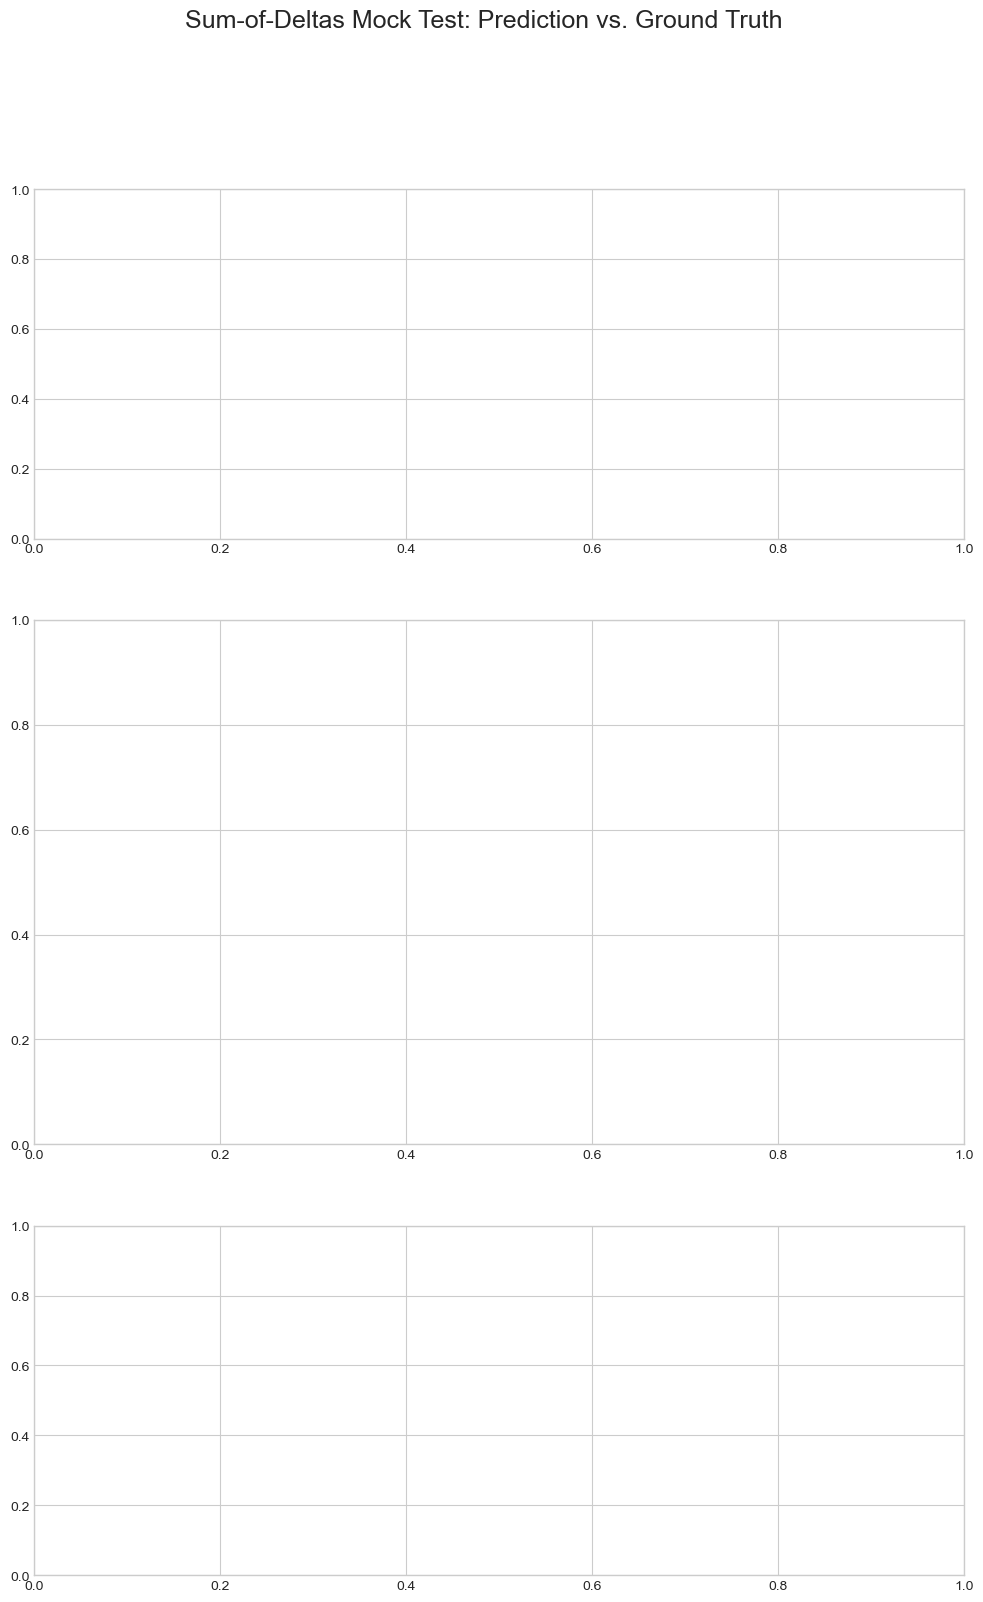

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import os

# --- CONFIGURATION ---
# Point this to the directory where your sum-of-deltas prediction HDF5 files are stored
PREDICTIONS_DIR = "delta_tanh_predictions"
# List of alphas to analyze and plot
ALPHAS_TO_ANALYZE = [0, 1]

# Define the job labels for the four runs
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}
# Output file for storing combined analysis results
OUTPUT_ANALYSIS_FILE = "final_analysis_results_sum_of_deltas.hdf5"

# --- UTILITY FUNCTIONS (Unchanged) ---
def calculate_mean_and_stat_error(predictions):
    """Calculates mean prediction and statistical error (Δ_stat)."""
    mean_pred = np.mean(predictions, axis=(0, 1))
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    delta_stat = np.sqrt(delta_latt**2 + delta_net**2)
    return mean_pred, delta_stat

def calculate_systematic_error(mean_final, stat_final, mean_ref, stat_ref):
    """Calculates systematic error using the pull-weighted method."""
    abs_diff = np.abs(mean_final - mean_ref)
    pull_denom = np.sqrt(stat_final**2 + stat_ref**2)
    pull_denom[pull_denom < 1e-15] = 1e-15
    pull = abs_diff / pull_denom
    syst_error = abs_diff * erf(pull / np.sqrt(2))
    return syst_error

# --- MAIN ANALYSIS SCRIPT ---
if __name__ == '__main__':
    # Dictionary to store results for each alpha
    all_alpha_results = {}
    time_extent = None # Will be determined from data

    # --- Loop over each Alpha value ---
    for alpha in ALPHAS_TO_ANALYZE:
        print(f"\n{'#'*70}\n### ANALYZING ALPHA = {alpha} ###\n{'#'*70}")

        results_this_alpha = {}

        # --- 1. Load data and calculate stat errors for all jobs for this alpha ---
        print(f"--- Loading prediction data for alpha = {alpha} ---")
        found_all_files = True
        for role, label in job_labels.items():
            filepath = os.path.join(PREDICTIONS_DIR, f"SoD_predictions_{label}_alpha{alpha}.hdf5")
            try:
                with h5py.File(filepath, 'r') as f:
                    predictions = f['predictions'][:]
                    mean, stat_err = calculate_mean_and_stat_error(predictions)
                    results_this_alpha[role] = {'mean': mean, 'stat_err': stat_err}

                    # Load ground truth momentum vector from the first file found for this alpha
                    if 'true_momentum_vector' not in results_this_alpha:
                         results_this_alpha['true_momentum'] = f['true_momentum_vector'][:]
                         # Determine time_extent from the length of the true momentum vector
                         if time_extent is None:
                             time_extent = len(results_this_alpha['true_momentum'])

                    # Load unsmeared components only once (from any file)
                    if 'unsmeared_peak_energies' not in locals():
                         if 'unsmeared_peak_energies' in f:
                             unsmeared_peak_energies = f['unsmeared_peak_energies'][:]
                             unsmeared_peak_amplitudes = f['unsmeared_peak_amplitudes'][:]
                             peak_mass = f.attrs.get('E_peak') # Read from attributes if saved
                             peak_amplitude = f.attrs.get('C_peak')
                         else:
                             unsmeared_peak_energies, unsmeared_peak_amplitudes, peak_mass, peak_amplitude = None, None, None, None

                    print(f"  Successfully loaded and processed '{label}' for alpha={alpha}")
            except FileNotFoundError:
                print(f"  ERROR: Missing prediction file: {filepath}. Cannot complete analysis for alpha={alpha}.")
                found_all_files = False
                break
            except Exception as e:
                 print(f"  ERROR loading {filepath}: {e}")
                 found_all_files = False
                 break

        if not found_all_files:
            continue
        if time_extent is None:
             print(f"  ERROR: Could not determine time_extent for alpha={alpha}. Skipping...")
             continue
        if 'true_momentum' not in results_this_alpha or results_this_alpha['true_momentum'] is None:
             print(f"  ERROR: Could not load 'true_momentum_vector' for alpha={alpha}. Skipping...")
             continue

        # --- 2. Calculate Systematic Errors for this alpha ---
        print(f"\n--- Calculating systematic errors for alpha = {alpha} ---")
        final_result = results_this_alpha['final_result']
        syst_err_b = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_alpha['ref_b']['mean'], results_this_alpha['ref_b']['stat_err'])
        syst_err_n = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_alpha['ref_n']['mean'], results_this_alpha['ref_n']['stat_err'])
        syst_err_rho = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_alpha['ref_rho']['mean'], results_this_alpha['ref_rho']['stat_err'])

        # --- 3. Calculate Final Total Error for this alpha ---
        total_error = np.sqrt(final_result['stat_err']**2 + syst_err_b**2 + syst_err_n**2 + syst_err_rho**2)

        # --- Store calculated errors for this alpha ---
        results_this_alpha['syst_err_b'] = syst_err_b
        results_this_alpha['syst_err_n'] = syst_err_n
        results_this_alpha['syst_err_rho'] = syst_err_rho
        results_this_alpha['total_error'] = total_error

        # Add results for this alpha to the main dictionary
        all_alpha_results[alpha] = results_this_alpha
        print(f"--- Finished calculations for alpha = {alpha} ---")

    # --- 4. Save Combined Analysis Results ---
    if all_alpha_results:
        print(f"\n--- Saving final analysis results to '{OUTPUT_ANALYSIS_FILE}' ---")
        with h5py.File(OUTPUT_ANALYSIS_FILE, 'w') as f:
             f.attrs['time_extent'] = time_extent
             if unsmeared_peak_energies is not None:
                f.create_dataset('unsmeared_peak_energies', data=unsmeared_peak_energies)
                f.create_dataset('unsmeared_peak_amplitudes', data=unsmeared_peak_amplitudes)
                if peak_mass is not None: f.attrs['E_peak'] = peak_mass
                if peak_amplitude is not None: f.attrs['C_peak'] = peak_amplitude

             for alpha, results in all_alpha_results.items():
                alpha_group = f.create_group(f'alpha_{alpha}')
                alpha_group.create_dataset('final_prediction_mean', data=results['final_result']['mean'])
                alpha_group.create_dataset('final_prediction_stat_error', data=results['final_result']['stat_err'])
                alpha_group.create_dataset('final_prediction_syst_error_b', data=results['syst_err_b'])
                alpha_group.create_dataset('final_prediction_syst_error_n', data=results['syst_err_n'])
                alpha_group.create_dataset('final_prediction_syst_error_rho', data=results['syst_err_rho'])
                alpha_group.create_dataset('final_prediction_total_error', data=results['total_error'])
                alpha_group.create_dataset('true_momentum_vector', data=results['true_momentum'])
        print("  Done saving analysis.")
    else:
        print("\nNo results were processed. Skipping saving and plotting.")
        exit()

    # --- 5. Final Visualization ---
    print("\n--- Generating final comparison plots ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    # Create 3 rows: Unseamred, Prediction+Truth, Error Budget
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), gridspec_kw={'height_ratios': [2, 3, 2]})
    fig.suptitle("Sum-of-Deltas Mock Test: Prediction vs. Ground Truth", fontsize=18)

    time_values = np.arange(time_extent)

    # --- Plot 1: Unseamred Spectral Density ---
    ax_rho = axes[0]
    if unsmeared_peak_energies is not None:
        markerline, stemlines, baseline = ax_rho.stem(
            unsmeared_peak_energies, unsmeared_peak_amplitudes,
            linefmt='grey', markerfmt='D', basefmt=" ", label='Delta Peaks'
        )
        plt.setp(stemlines, 'linewidth', 1)
        plt.setp(markerline, 'markersize', 4)
        ax_rho.set_title("Original Un-smeared Spectral Density ρ(ω)")
        ax_rho.set_xlabel("Energy ω [GeV]")
        ax_rho.set_ylabel("Amplitude A$_n$")
        ax_rho.set_xlim(left=0, right=max(2.0, peak_mass * 1.5 if peak_mass else 2.0)) # Zoom in on low energy
        ax_rho.grid(True)
    else:
        ax_rho.text(0.5, 0.5, "Un-smeared data not found", ha='center', va='center')
        ax_rho.set_title("Original Un-smeared Spectral Density ρ(ω)")


    # --- Plot 2: Prediction vs Truth (Momenta) ---
    ax_pred = axes[1]
    colors = plt.cm.viridis(np.linspace(0, 0.7, len(ALPHAS_TO_ANALYZE)))
    markers = ['o', 's']

    for i, alpha in enumerate(ALPHAS_TO_ANALYZE):
        if alpha not in all_alpha_results: continue
        results = all_alpha_results[alpha]
        final_mean = results['final_result']['mean']
        total_err = results['total_error']
        true_momentum = results['true_momentum']
        color = colors[i]
        marker = markers[i]

        ax_pred.plot(time_values, true_momentum, '-', color=color, lw=2.5, alpha=0.5, label=f'True D({alpha}, τ)')
        ax_pred.errorbar(time_values, final_mean, yerr=total_err,
                         fmt=marker, markersize=4, color=color, ecolor=color, capsize=5, elinewidth=1.5,
                         label=f'Prediction D({alpha}, τ) (Total Error)')

    ax_pred.set_title("Predicted vs. True Correlator Momenta")
    ax_pred.set_xlabel("Time Slice τ")
    ax_pred.set_ylabel("Momentum Value D(α, τ) [Log Scale]")
    ax_pred.set_yscale('log')
    ax_pred.legend(fontsize=10)
    ax_pred.grid(True, which="both", ls="--")

    # --- Plot 3: Error Budget ---
    ax_err = axes[2]
    linestyles = ['-', '--', ':', '-.']

    for i, alpha in enumerate(ALPHAS_TO_ANALYZE):
        if alpha not in all_alpha_results: continue
        results = all_alpha_results[alpha]
        final_mean = results['final_result']['mean']
        stat_err = results['final_result']['stat_err']
        syst_b = results['syst_err_b']
        syst_n = results['syst_err_n']
        syst_rho = results['syst_err_rho']
        total_err = results['total_error']
        color = colors[i]
        marker = markers[i]

        # Avoid division by zero for relative error, use absolute error instead if mean is tiny
        plot_denom = np.where(np.abs(final_mean) > 1e-15, np.abs(final_mean), 1.0)
        use_relative = np.abs(final_mean) > 1e-15

        label_suffix = f'(α={alpha})'
        ax_err.plot(time_values[use_relative], np.abs(stat_err[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[0], color=color, label=f'Stat {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(syst_b[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[1], color=color, label=f'Syst Basis {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(syst_n[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[2], color=color, label=f'Syst Network {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(syst_rho[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[3], color=color, label=f'Syst Dataset {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(total_err[use_relative] / plot_denom[use_relative]) * 100, marker=None, linestyle='-', color=color, lw=2.5, label=f'Total {label_suffix}')

    ax_err.set_title("Error Budget")
    ax_err.set_xlabel("Time Slice τ")
    ax_err.set_ylabel("Relative Error (%)")
    ax_err.set_yscale('log')
    ax_err.legend(fontsize=9, ncol=2) #, bbox_to_anchor=(1.04, 1), loc='upper left')
    ax_err.grid(True, which="both", ls="--")
    ax_err.set_ylim(bottom=1e-2) # Adjust y-limit if needed

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('prediction_sum_of_deltas_analysis.png')
    plt.show()


######################################################################
### ANALYZING ALPHA = 0 ###
######################################################################
--- Loading prediction data for alpha = 0 ---
  Successfully loaded and processed 'Nmax' for alpha=0
  Successfully loaded and processed 'Nref_b' for alpha=0
  Successfully loaded and processed 'Nref_n' for alpha=0
  Successfully loaded and processed 'Nref_rho' for alpha=0

--- Calculating systematic errors for alpha = 0 ---
--- Finished calculations for alpha = 0 ---

--- Saving final analysis results to 'final_analysis_results_delta_tanh_momenta.hdf5' ---
  Done saving analysis.

--- Generating final comparison plots ---


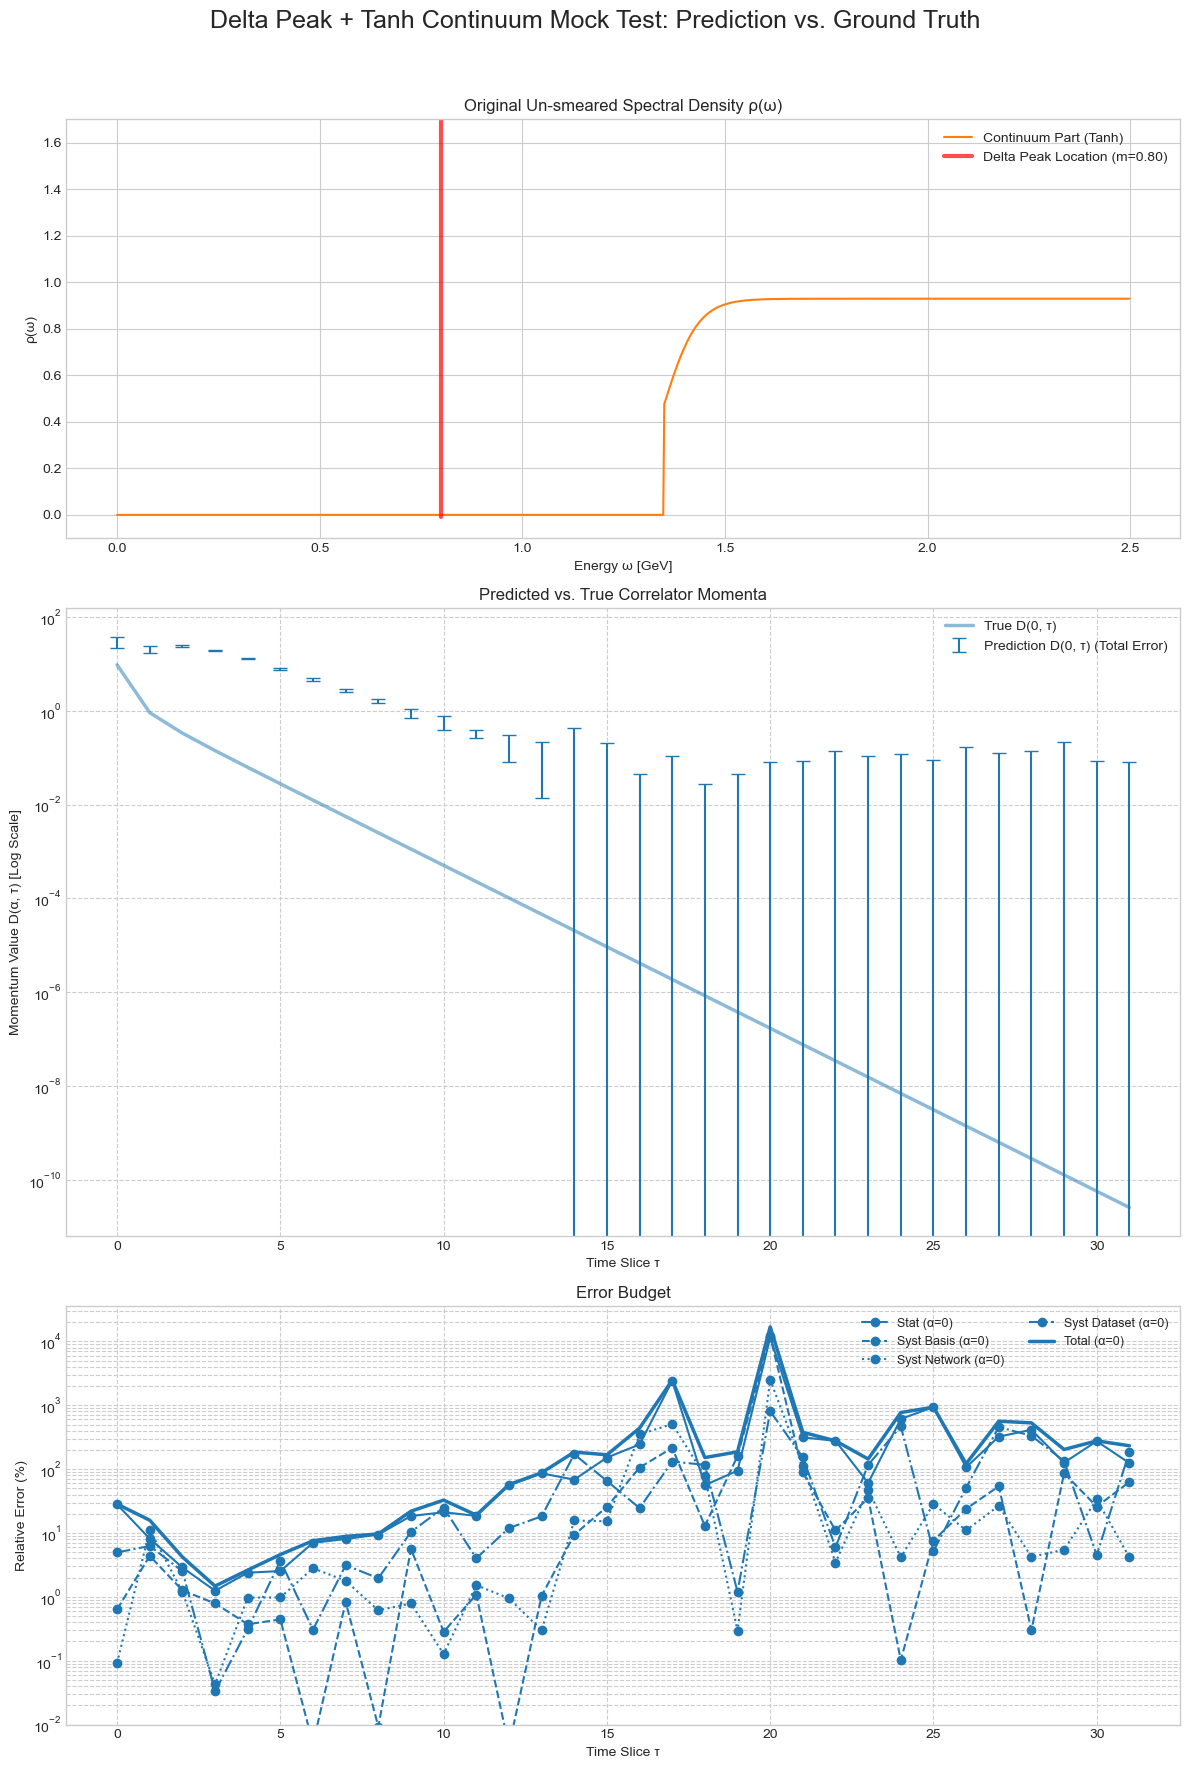

In [39]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import os

# --- CONFIGURATION ---
# Point this to the directory where your delta+tanh prediction HDF5 files are stored
PREDICTIONS_DIR = "delta_tanh_predictions"
# List of alphas to analyze and plot
ALPHAS_TO_ANALYZE = [0]

# Define the job labels for the four runs
job_labels = {
    "final_result": "Nmax",
    "ref_b": "Nref_b",
    "ref_n": "Nref_n",
    "ref_rho": "Nref_rho"
}
# Output file for storing combined analysis results
OUTPUT_ANALYSIS_FILE = "final_analysis_results_delta_tanh_momenta.hdf5"

# --- UTILITY FUNCTIONS (Unchanged) ---
def calculate_mean_and_stat_error(predictions):
    """Calculates mean prediction and statistical error (Δ_stat)."""
    mean_pred = np.mean(predictions, axis=(0, 1))
    delta_latt = np.mean(np.std(predictions, axis=0), axis=0)
    delta_net = np.mean(np.std(predictions, axis=1), axis=0)
    delta_stat = np.sqrt(delta_latt**2 + delta_net**2)
    return mean_pred, delta_stat

def calculate_systematic_error(mean_final, stat_final, mean_ref, stat_ref):
    """Calculates systematic error using the pull-weighted method."""
    abs_diff = np.abs(mean_final - mean_ref)
    pull_denom = np.sqrt(stat_final**2 + stat_ref**2)
    pull_denom[pull_denom < 1e-15] = 1e-15
    pull = abs_diff / pull_denom
    syst_error = abs_diff * erf(pull / np.sqrt(2))
    return syst_error

# --- MAIN ANALYSIS SCRIPT ---
if __name__ == '__main__':
    # Dictionary to store results for each alpha
    all_alpha_results = {}
    time_extent = None # Will be determined from data
    # Initialize variables for unsmeared data
    unsmeared_continuum, unsmeared_energy_grid = None, None
    peak_mass, peak_amplitude, cont_E0 = None, None, None


    # --- Loop over each Alpha value ---
    for alpha in ALPHAS_TO_ANALYZE:
        print(f"\n{'#'*70}\n### ANALYZING ALPHA = {alpha} ###\n{'#'*70}")

        results_this_alpha = {}

        # --- 1. Load data and calculate stat errors for all jobs for this alpha ---
        print(f"--- Loading prediction data for alpha = {alpha} ---")
        found_all_files = True
        for role, label in job_labels.items():
            # Construct the correct filename for this mock data
            filepath = os.path.join(PREDICTIONS_DIR, f"DeltaTanh_predictions_{label}_alpha{alpha}.hdf5")
            try:
                with h5py.File(filepath, 'r') as f:
                    predictions = f['predictions'][:]
                    mean, stat_err = calculate_mean_and_stat_error(predictions)
                    results_this_alpha[role] = {'mean': mean, 'stat_err': stat_err}

                    # Load correct ground truth key
                    if 'true_momentum_vector' not in results_this_alpha:
                         results_this_alpha['true_momentum'] = f['true_momentum_vector'][:]
                         if time_extent is None:
                             time_extent = len(results_this_alpha['true_momentum'])

                    # Load unsmeared components only once
                    if unsmeared_continuum is None and 'unsmeared_continuum' in f:
                         unsmeared_continuum = f['unsmeared_continuum'][:]
                         unsmeared_energy_grid = f['unsmeared_energy_grid'][:]
                         peak_mass = f.attrs.get('peak_mass')
                         peak_amplitude = f.attrs.get('peak_amplitude')
                         cont_E0 = f.attrs.get('continuum_E0')

                    print(f"  Successfully loaded and processed '{label}' for alpha={alpha}")
            except FileNotFoundError:
                print(f"  ERROR: Missing prediction file: {filepath}. Cannot complete analysis for alpha={alpha}.")
                found_all_files = False
                break
            except Exception as e:
                 print(f"  ERROR loading {filepath}: {e}")
                 found_all_files = False
                 break

        if not found_all_files: continue
        if time_extent is None: continue
        if 'true_momentum' not in results_this_alpha or results_this_alpha['true_momentum'] is None: continue


        # --- 2. Calculate Systematic Errors for this alpha ---
        print(f"\n--- Calculating systematic errors for alpha = {alpha} ---")
        final_result = results_this_alpha['final_result']
        syst_err_b = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_alpha['ref_b']['mean'], results_this_alpha['ref_b']['stat_err'])
        syst_err_n = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_alpha['ref_n']['mean'], results_this_alpha['ref_n']['stat_err'])
        syst_err_rho = calculate_systematic_error(final_result['mean'], final_result['stat_err'], results_this_alpha['ref_rho']['mean'], results_this_alpha['ref_rho']['stat_err'])

        # --- 3. Calculate Final Total Error for this alpha ---
        total_error = np.sqrt(final_result['stat_err']**2 + syst_err_b**2 + syst_err_n**2 + syst_err_rho**2)

        # --- Store calculated errors ---
        results_this_alpha['syst_err_b'] = syst_err_b
        results_this_alpha['syst_err_n'] = syst_err_n
        results_this_alpha['syst_err_rho'] = syst_err_rho
        results_this_alpha['total_error'] = total_error
        all_alpha_results[alpha] = results_this_alpha
        print(f"--- Finished calculations for alpha = {alpha} ---")

    # --- 4. Save Combined Analysis Results ---
    if all_alpha_results:
        print(f"\n--- Saving final analysis results to '{OUTPUT_ANALYSIS_FILE}' ---")
        with h5py.File(OUTPUT_ANALYSIS_FILE, 'w') as f:
             f.attrs['time_extent'] = time_extent
             if unsmeared_continuum is not None:
                f.create_dataset('unsmeared_continuum', data=unsmeared_continuum)
                f.create_dataset('unsmeared_energy_grid', data=unsmeared_energy_grid)
                if peak_mass is not None: f.attrs['peak_mass'] = peak_mass
                if peak_amplitude is not None: f.attrs['peak_amplitude'] = peak_amplitude
                if cont_E0 is not None: f.attrs['continuum_E0'] = cont_E0

             for alpha, results in all_alpha_results.items():
                alpha_group = f.create_group(f'alpha_{alpha}')
                alpha_group.create_dataset('final_prediction_mean', data=results['final_result']['mean'])
                alpha_group.create_dataset('final_prediction_stat_error', data=results['final_result']['stat_err'])
                alpha_group.create_dataset('final_prediction_syst_error_b', data=results['syst_err_b'])
                alpha_group.create_dataset('final_prediction_syst_error_n', data=results['syst_err_n'])
                alpha_group.create_dataset('final_prediction_syst_error_rho', data=results['syst_err_rho'])
                alpha_group.create_dataset('final_prediction_total_error', data=results['total_error'])
                alpha_group.create_dataset('true_momentum_vector', data=results['true_momentum'])
        print("  Done saving analysis.")
    else:
        print("\nNo results were processed. Skipping saving and plotting.")
        exit()

    # --- 5. Final Visualization ---
    print("\n--- Generating final comparison plots ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    # Create 3 rows: Unseamred, Prediction+Truth, Error Budget
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), gridspec_kw={'height_ratios': [2, 3, 2]})
    fig.suptitle("Delta Peak + Tanh Continuum Mock Test: Prediction vs. Ground Truth", fontsize=18)

    time_values = np.arange(time_extent)

    # --- Plot 1: Unseamred Spectral Density ---
    ax_rho = axes[0]
    if unsmeared_continuum is not None and unsmeared_energy_grid is not None:
        ax_rho.plot(unsmeared_energy_grid[:1000], unsmeared_continuum[:1000], color='tab:orange', label='Continuum Part (Tanh)')
        if peak_mass is not None:
             ax_rho.axvline(x=peak_mass, color='red', linestyle='-', ymin=0.05, linewidth=3, alpha=0.7, label=f'Delta Peak Location (m={peak_mass:.2f})')
        ax_rho.set_title("Original Un-smeared Spectral Density ρ(ω)")
        ax_rho.set_xlabel("Energy ω [GeV]")
        ax_rho.set_ylabel("ρ(ω)")
        xlim_max = max(5.0, peak_mass * 2 if peak_mass else 5.0)
        #ax_rho.set_xlim(left=0, right=xlim_max)
        ylim_max = max(np.max(unsmeared_continuum) if unsmeared_continuum.size > 0 else 0, peak_amplitude if peak_amplitude else 0)
        ax_rho.set_ylim(-0.1, ylim_max + 0.2)
        ax_rho.legend()
        ax_rho.grid(True)
    else:
        ax_rho.text(0.5, 0.5, "Un-smeared data not found", ha='center', va='center')
        ax_rho.set_title("Original Un-smeared Spectral Density ρ(ω)")


    # --- Plot 2: Prediction vs Truth (Momenta) ---
    ax_pred = axes[1]
    colors = ['tab:blue']
    markers = ['o', 's']

    for i, alpha in enumerate(ALPHAS_TO_ANALYZE):
        if alpha not in all_alpha_results: continue
        results = all_alpha_results[alpha]
        final_mean = results['final_result']['mean']
        total_err = results['total_error']
        true_momentum = results['true_momentum']
        color = colors[i]
        marker = markers[i]

        ax_pred.plot(time_values, true_momentum, '-', color=color, lw=2.5, alpha=0.5, label=f'True D({alpha}, τ)')
        ax_pred.errorbar(time_values, final_mean, yerr=total_err,
                         fmt=' ', markersize=4, color=color, ecolor=color, capsize=5, elinewidth=1.5,
                         label=f'Prediction D({alpha}, τ) (Total Error)')

    ax_pred.set_title("Predicted vs. True Correlator Momenta")
    ax_pred.set_xlabel("Time Slice τ")
    ax_pred.set_ylabel("Momentum Value D(α, τ) [Log Scale]")
    ax_pred.set_yscale('log')
    ax_pred.legend(fontsize=10)
    ax_pred.grid(True, which="both", ls="--")

    # --- Plot 3: Error Budget ---
    ax_err = axes[2]
    linestyles = ['-', '--', ':', '-.']

    for i, alpha in enumerate(ALPHAS_TO_ANALYZE):
        if alpha not in all_alpha_results: continue
        results = all_alpha_results[alpha]
        final_mean = results['final_result']['mean']
        stat_err = results['final_result']['stat_err']
        syst_b = results['syst_err_b']
        syst_n = results['syst_err_n']
        syst_rho = results['syst_err_rho']
        total_err = results['total_error']
        color = colors[i]
        marker = markers[i]

        plot_denom = np.where(np.abs(final_mean) > 1e-15, np.abs(final_mean), 1.0)
        use_relative = np.abs(final_mean) > 1e-15

        label_suffix = f'(α={alpha})'
        ax_err.plot(time_values[use_relative], np.abs(stat_err[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[0], color=color, label=f'Stat {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(syst_b[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[1], color=color, label=f'Syst Basis {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(syst_n[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[2], color=color, label=f'Syst Network {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(syst_rho[use_relative] / plot_denom[use_relative]) * 100, marker=marker, linestyle=linestyles[3], color=color, label=f'Syst Dataset {label_suffix}')
        ax_err.plot(time_values[use_relative], np.abs(total_err[use_relative] / plot_denom[use_relative]) * 100, marker=None, linestyle='-', color=color, lw=2.5, label=f'Total {label_suffix}')

    ax_err.set_title("Error Budget")
    ax_err.set_xlabel("Time Slice τ")
    ax_err.set_ylabel("Relative Error (%)")
    ax_err.set_yscale('log')
    ax_err.legend(fontsize=9, ncol=2)
    ax_err.grid(True, which="both", ls="--")
    ax_err.set_ylim(bottom=1e-2)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('prediction_delta_tanh_analysis.png')
    plt.show()